## 分析韩国首尔市新型冠状病毒发生现状

In [1]:
import pandas as pd
import numpy as np

In [3]:
file_name = f"seoul-covid19_6_30_.csv"  #데이터가 많이 바뀌어서 따로 6월30일자 데이터를 저장해서 파일을 불러와서 시각화하기

In [4]:
file_name

'seoul-covid19_6_30_.csv'

In [5]:
pd.read_csv(file_name, encoding = "utf-8")

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
...,...,...,...,...,...,...,...
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)


In [6]:
df = pd.read_csv(file_name, encoding = "utf-8")

In [7]:
df = df.sort_values(["연번"], ascending=False)  #特定项目
df

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
...,...,...,...,...,...,...,...
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)


In [8]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원


In [9]:
df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)
1320,1,2,1.24.,강서구,중국 우한시,해외 접촉,국립중앙의료원(퇴원)


<AxesSubplot:title={'center':'한글 제목'}>

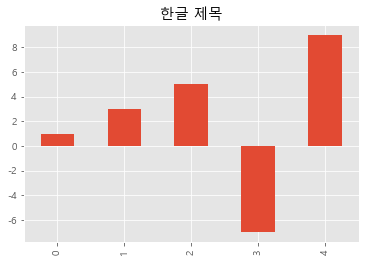

In [10]:
# matplotlib.pyplot 을 통해 한글폰트를 설정합니다.
# plt.style.use 로 "fivethirtyeight" 스타일을 사용해 봅니다.
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic") # window사용자는 폰트 이렇게 설정
plt.rc("axes", unicode_minus=False)
plt.style.use("ggplot") #선생님은 fivethirtyeight를 사용함
pd.Series([1,3,5,-7,9]).plot.bar(title="한글 제목")

In [11]:
from IPython.display import set_matplotlib_formats #字符设置
set_matplotlib_formats("retina")

In [12]:
df["확진일"].value_counts()#确诊日 #value_counts()는 빈도수를 나타낸다 频率
#oubject type and 수치형 type도 빈도수로 많이 나타낸다.

3.10.    46
6.12.    30
6.06.    29
6.05.    27
3.9.     26
         ..
2.2.      1
4.20.     1
5.17.     1
4.24.     1
3.5.      1
Name: 확진일, Length: 131, dtype: int64

In [13]:
# "확진일" 컬럼의 데이터가 날짜 형태가 아니라 문자형태 입니다.

df["확진일"].head(1)

0    6.30.
Name: 확진일, dtype: object

In [14]:
#pd.to_datetime : 기존 object 타입을 데이터 타입으로 변경해서 날짜 형태로 변환합니다. ## 按照日期工作的

df["확진일자"] = pd.to_datetime("2020-" + df["확진일"].str.replace(".","-"))
df[["확진일","확진일자"]].head()

<ipython-input-14-8025bd7371e7>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df["확진일자"] = pd.to_datetime("2020-" + df["확진일"].str.replace(".","-"))


,확진일,확진일자
0,6.30.,2020-06-30
1,6.30.,2020-06-30
2,6.30.,2020-06-30
3,6.30.,2020-06-30
4,6.30.,2020-06-30


0       6
1       6
2       6
3       6
4       6
       ..
1316    1
1317    1
1318    1
1319    1
1320    1
Name: 확진일자, Length: 1321, dtype: int64

In [16]:
df["확진일자"].dt.year

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
1316    2020
1317    2020
1318    2020
1319    2020
1320    2020
Name: 확진일자, Length: 1321, dtype: int64

In [17]:
df["월"] = df["확진일자"].dt.month
df[["확진일","확진일자","월"]].tail()

,확진일,확진일자,월
1316,1.31.,2020-01-31,1
1317,1.30.,2020-01-30,1
1318,1.30.,2020-01-30,1
1319,1.30.,2020-01-30,1
1320,1.24.,2020-01-24,1


In [18]:
df["주"] = df["확진일자"].dt.week

<ipython-input-18-0fc312f73620>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["주"] = df["확진일자"].dt.week


In [19]:
df["월"] = df["확진일자"].dt.month
df[["확진일","확진일자","월","주"]].tail()

,확진일,확진일자,월,주
1316,1.31.,2020-01-31,1,5
1317,1.30.,2020-01-30,1,5
1318,1.30.,2020-01-30,1,5
1319,1.30.,2020-01-30,1,5
1320,1.24.,2020-01-24,1,4


In [20]:
#여기까지 새로운 컬럼인 월과 주를 만들고 시각화 함

<AxesSubplot:>

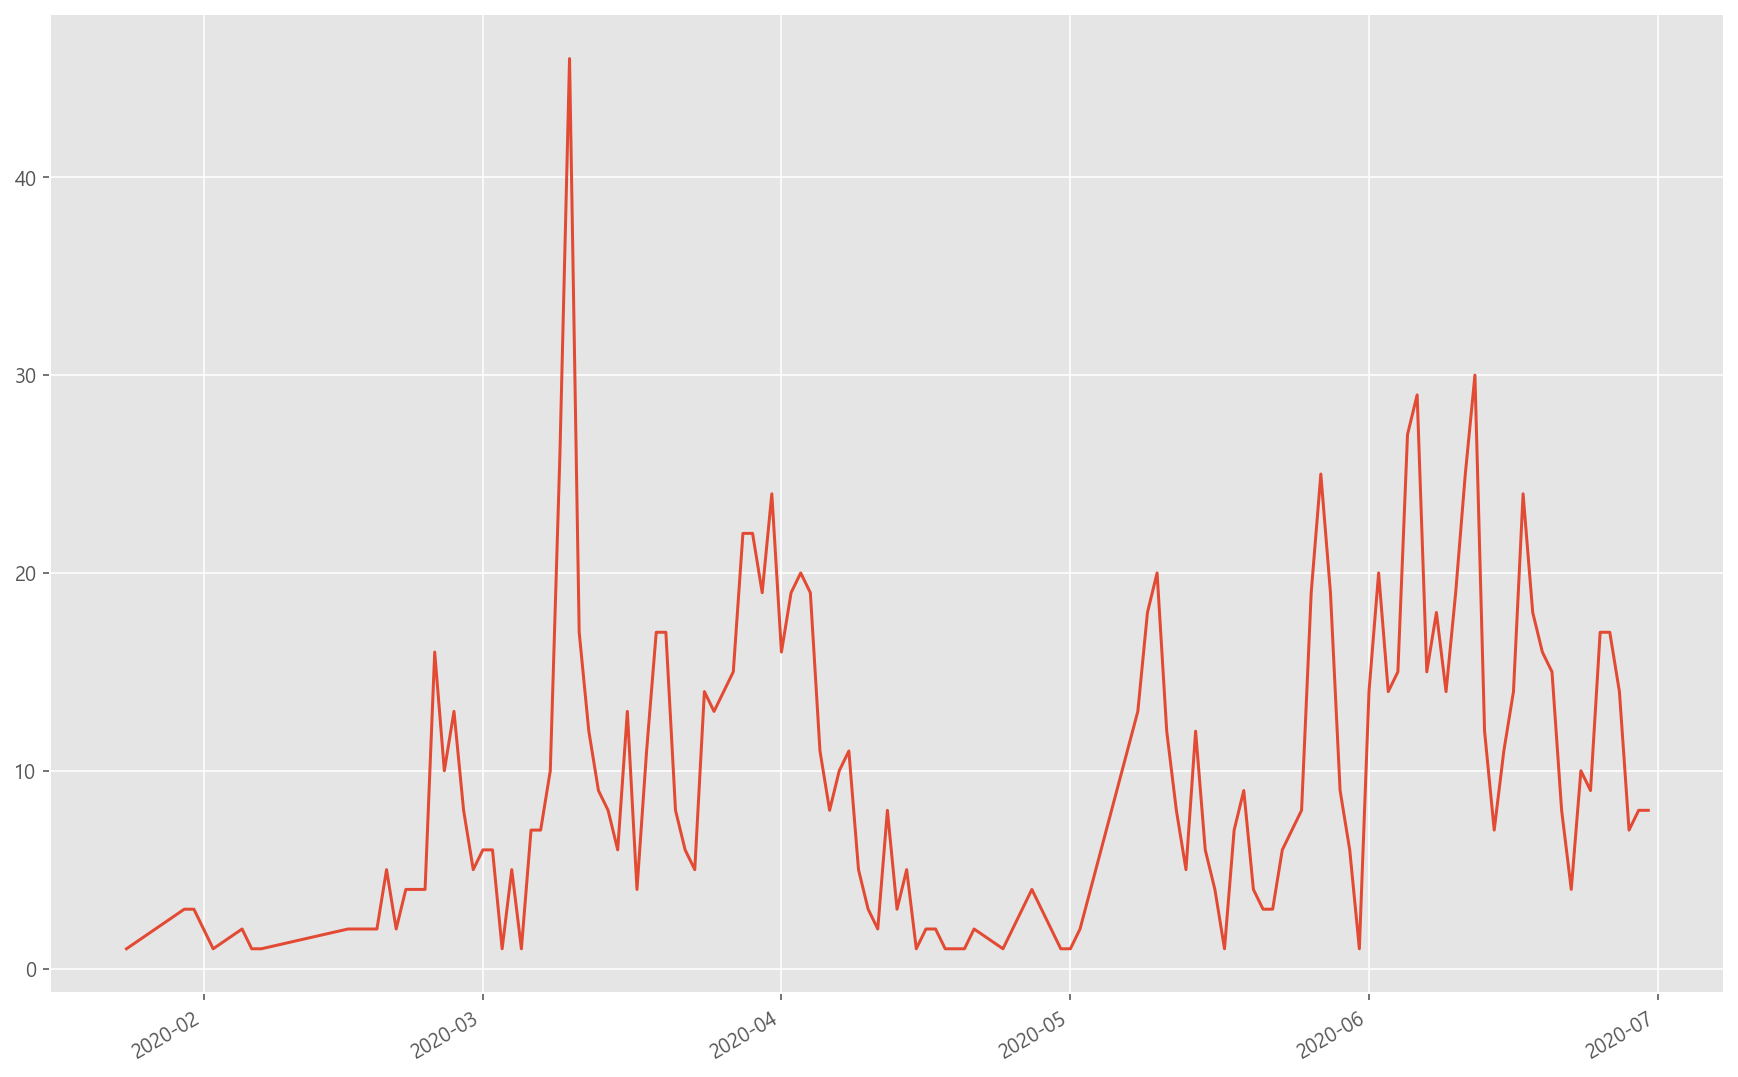

In [144]:
df["확진일자"].value_counts().sort_index().plot(figsize=(15,10)) #여기서 sort_index()는 시간 순으로 나타내기 위해서
##按月数据可视化

In [22]:
#각 꼭지점에 수치 나타내기
#연도는 모두 2020년이기 때문에 월일만 표기되도록 슬라이싱을 사용해 "월일" 컬럼을 만듭니다.
df["월일"] = df["확진일자"].astype(str).map(lambda x:x[-5:]) #타입을 문자열로 바꾸어 주고 슬라이싱을 하여 월,일만 가져온다.
day_count = df["월일"].value_counts().sort_index()
day_count.iloc[2] #loc는 정확히 인덱스 값이 일치 할 때 사용할수 있다.


3

In [26]:
#len(day_count):  #각 꼭지점에 수치를 반복해서 나타내주기 위해서 for문을 사용할 것이다. for문을 사용하기 위해서는 우선 길이가 얼마나 되나 확인해야 하기 때문에 len으로 길이가 몇인지 알아보자!
for i in range(len(day_count)):
    print(i, day_count.iloc[i]) #28번째 확진자가 발생했었을 날에 46명이 발생함

0 1
1 3
2 3
3 1
4 2
5 1
6 1
7 2
8 2
9 5
10 2
11 4
12 4
13 4
14 16
15 10
16 13
17 8
18 5
19 6
20 6
21 1
22 5
23 1
24 7
25 7
26 10
27 26
28 46
29 17
30 12
31 9
32 8
33 6
34 13
35 4
36 11
37 17
38 17
39 8
40 6
41 5
42 14
43 13
44 14
45 15
46 22
47 22
48 19
49 24
50 16
51 19
52 20
53 19
54 11
55 8
56 10
57 11
58 5
59 3
60 2
61 8
62 3
63 5
64 1
65 2
66 2
67 1
68 1
69 1
70 2
71 1
72 4
73 1
74 1
75 2
76 13
77 18
78 20
79 12
80 8
81 5
82 12
83 6
84 4
85 1
86 7
87 9
88 4
89 3
90 3
91 6
92 7
93 8
94 19
95 25
96 19
97 9
98 6
99 1
100 14
101 20
102 14
103 15
104 27
105 29
106 15
107 18
108 14
109 19
110 25
111 30
112 12
113 7
114 11
115 14
116 24
117 18
118 16
119 15
120 8
121 4
122 10
123 9
124 17
125 17
126 14
127 7
128 8
129 8


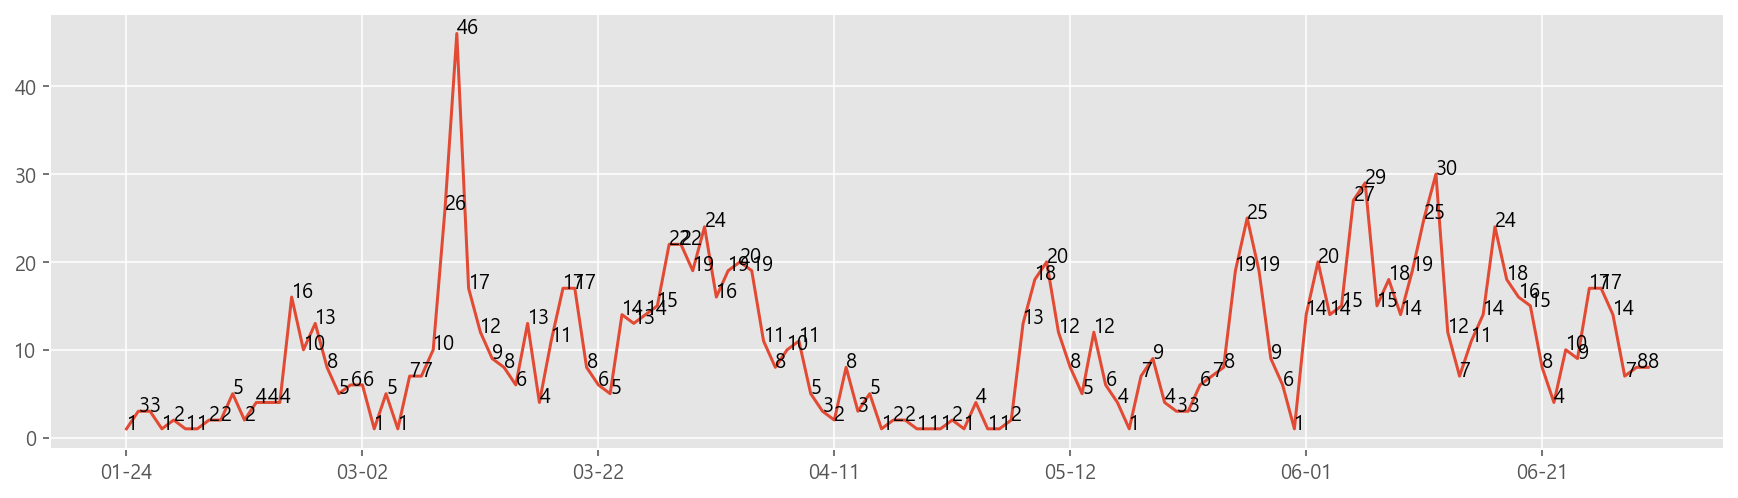

In [27]:
g = day_count.plot(figsize=(15,4))    ##标在顶点 确诊数
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    g.text(x=i,y=case_count,s=case_count) #옵션을 보고 싶으면 shift + tap키를 눌러라!, #x는 인덱스, y는 좌표상 y, s는 무엇을 나타낼거냐
#모든 날, 꼭지점에 수치 나타내기

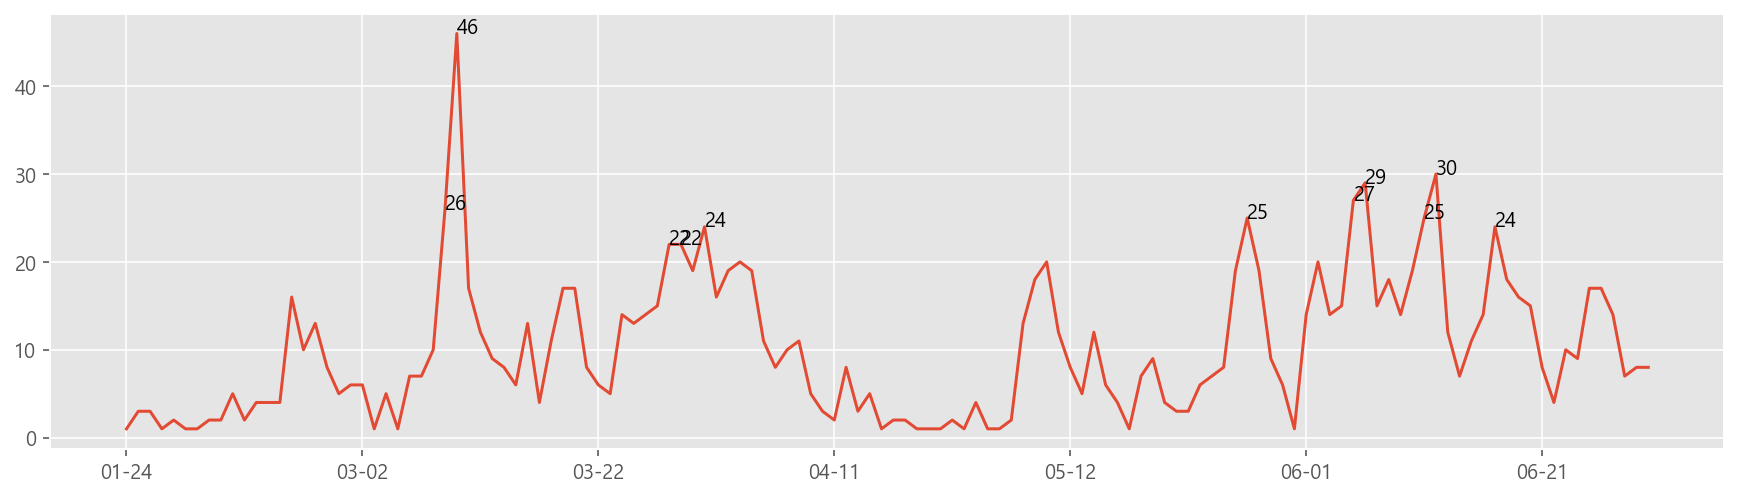

In [28]:
#특정한 날에만 꼭지점에 수치 나타내기
g = day_count.plot(figsize=(15,4))
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count>20:
        g.text(x=i,y=case_count,s=case_count) #옵션을 보고 싶으면 shift + tap키를 눌러라!, #x는 인덱스, y는 좌표상 y, s는 무엇을 나타낼거냐


In [29]:
#확진자가 가장 많은 날을 구하자  ##确认 确诊最多的日子
day_count #날마다 확진자가 얼마나 나왔는지 표시
day_count.describe() #mean,50% 평균값 #max 가장 많이 나온날
day_count[day_count == day_count.max()]

03-10    46
Name: 월일, dtype: int64

In [30]:
df[df["월일"] =="03-10"].head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
1119,202,7567,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1120,201,7711,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1121,200,7555,3.10.,구로구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1122,199,7725,3.10.,양천구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1123,198,7539,3.10.,양천구,-,콜센터직원 접촉,서남병원(퇴원),2020-03-10,3,11,03-10


<AxesSubplot:>

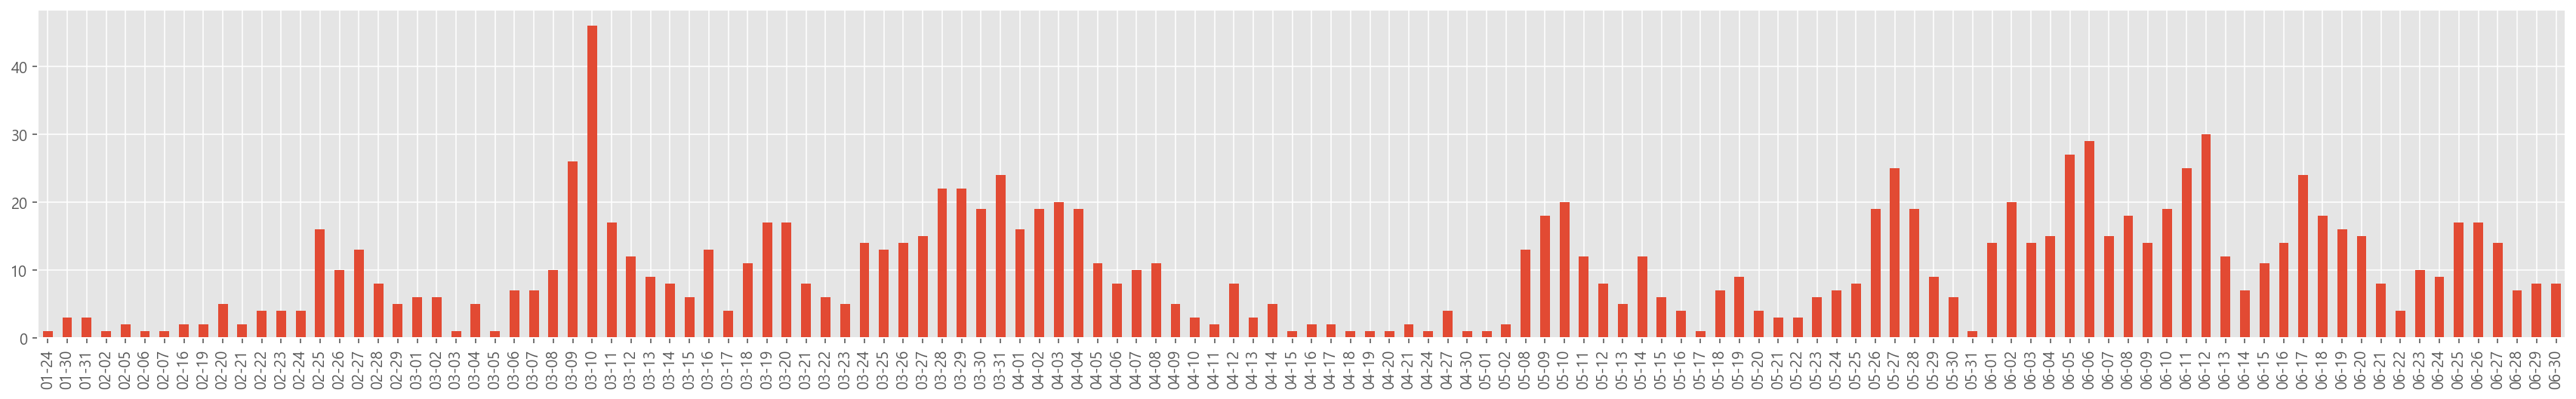

In [31]:
#막대그래프 그리기
day_count.plot.bar(figsize=(30,4))

<AxesSubplot:>

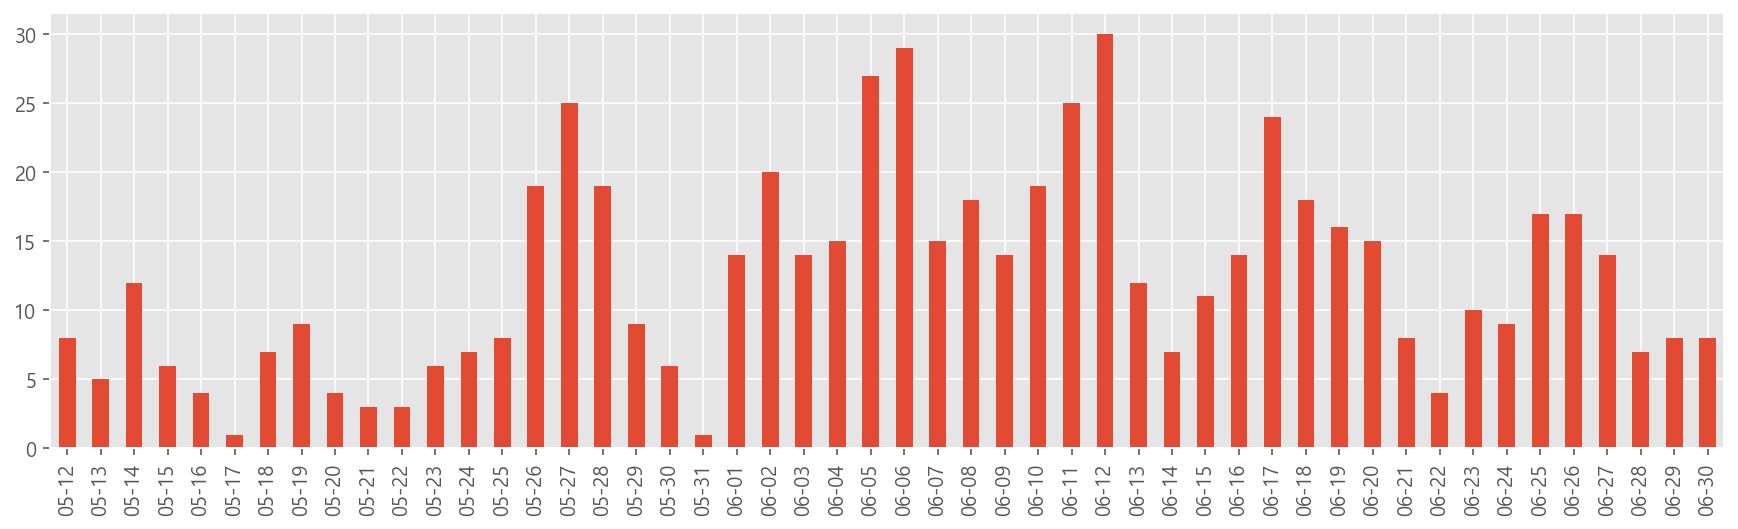

In [32]:
#막대그래프에 다 표현하기 너무 많아서 , 슬라이싱을 통해서 최근 데이터만 가져온다.
day_count[-50:].plot.bar(figsize=(15,4))

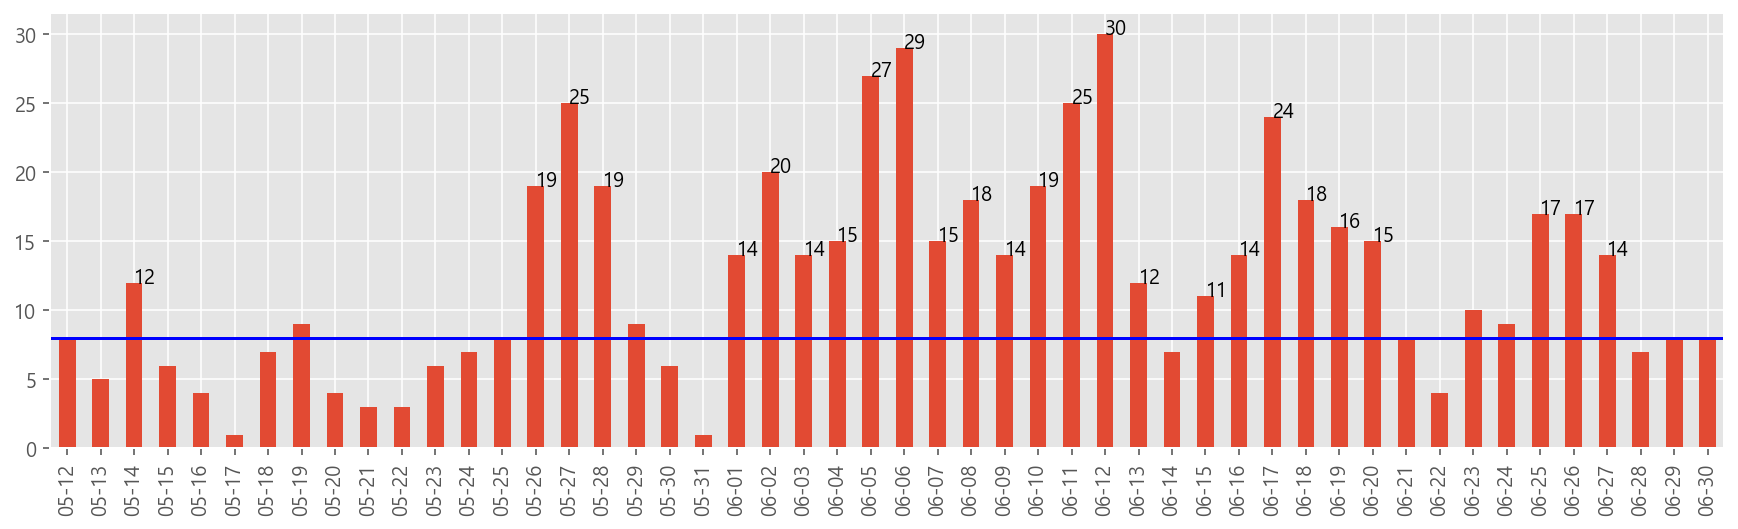

In [33]:
#막대그래프에도 각각 수치 표시해주기
g = day_count[-50:].plot.bar(figsize=(15,4))
g.axhline(day_count.median(), linestyle="-", color="blue")

for i in range(50):
    case_count = day_count[-50:].iloc[i]
    if case_count > 10:
        g.text(x=i, y=case_count, s=case_count)
        

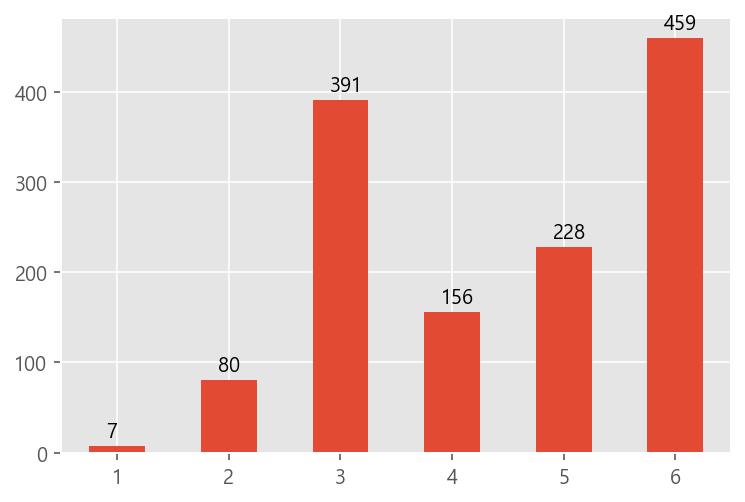

In [34]:
#월별 확진자 수 그리기
month_case = df["월"].value_counts().sort_index()
g = month_case.plot.bar(rot=0) #rot = 0 으로 거꾸로 된 숫자를 반드시 세우기 (밑변에 있는)
for i in range(len(month_case)): 
    g.text(x=i-0.1,y=month_case.iloc[i]+10,s=month_case.iloc[i])

In [35]:
month_case.iloc[0]

7

<AxesSubplot:>

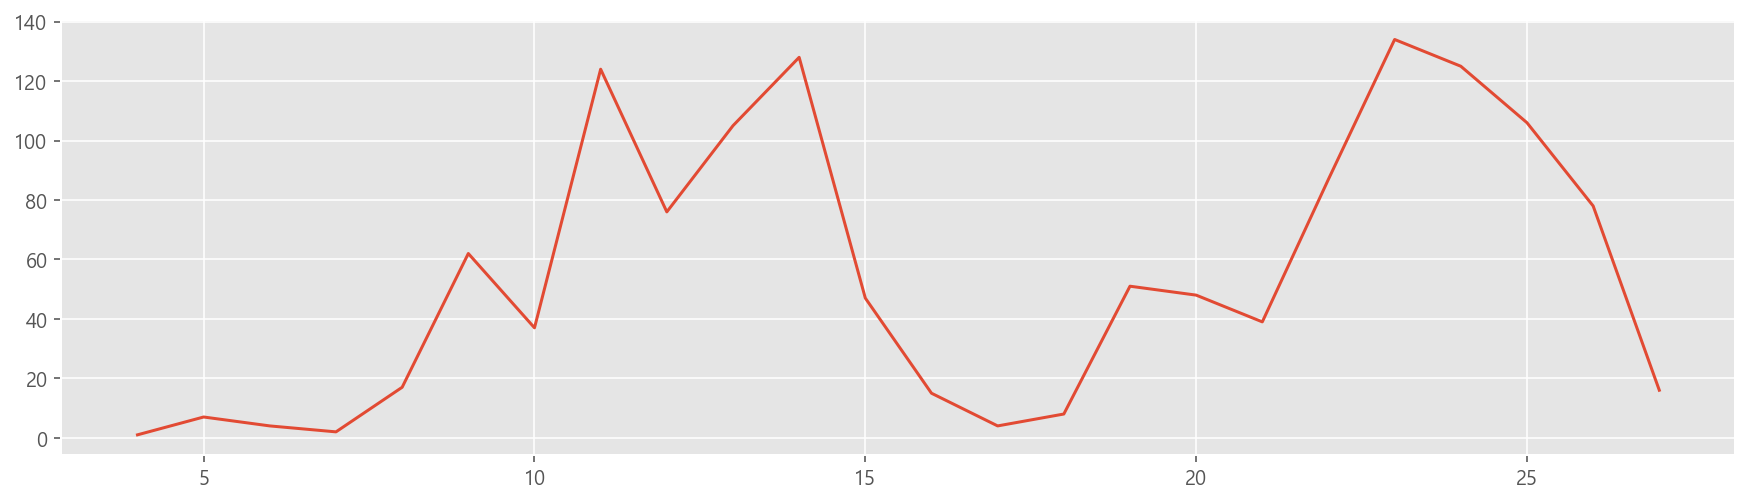

In [36]:
#주 단위 확진자 수 구하기
#선,막대 그래프
weekly_case = df["주"].value_counts().sort_index() #시리즈 데이터에서만 사용할 수 있음
weekly_case.plot(figsize =(15,4))

<AxesSubplot:>

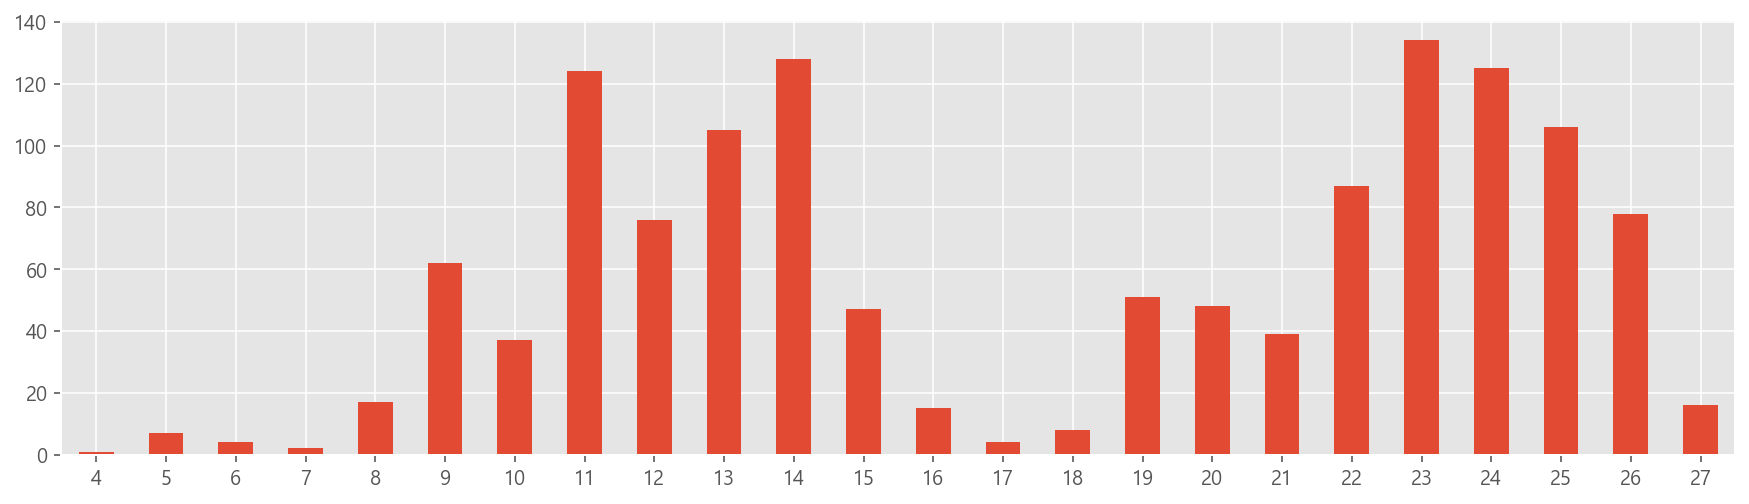

In [37]:
weekly_case.plot.bar(figsize =(15,4), rot = 0)

In [38]:
df


,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-,2020-06-30,6,27,06-30
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,06-30
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,06-30
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,06-30
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,06-30
...,...,...,...,...,...,...,...,...,...,...,...
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원),2020-01-31,1,5,01-31
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,1,5,01-30
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30


In [39]:
month_weekly_case = df.groupby(["월","주"])["연번"].count() #빈도수를 알고 싶을 떄 #series data에서는 value_counts #DataFrame에서는 groupby()로 확인한다
month_weekly_case

월  주 
1  4       1
   5       6
2  5       1
   6       4
   7       2
   8      17
   9      56
3  9       6
   10     37
   11    124
   12     76
   13    105
   14     43
4  14     85
   15     47
   16     15
   17      4
   18      5
5  18      3
   19     51
   20     48
   21     39
   22     87
6  23    134
   24    125
   25    106
   26     78
   27     16
Name: 연번, dtype: int64

<AxesSubplot:xlabel='월,주'>

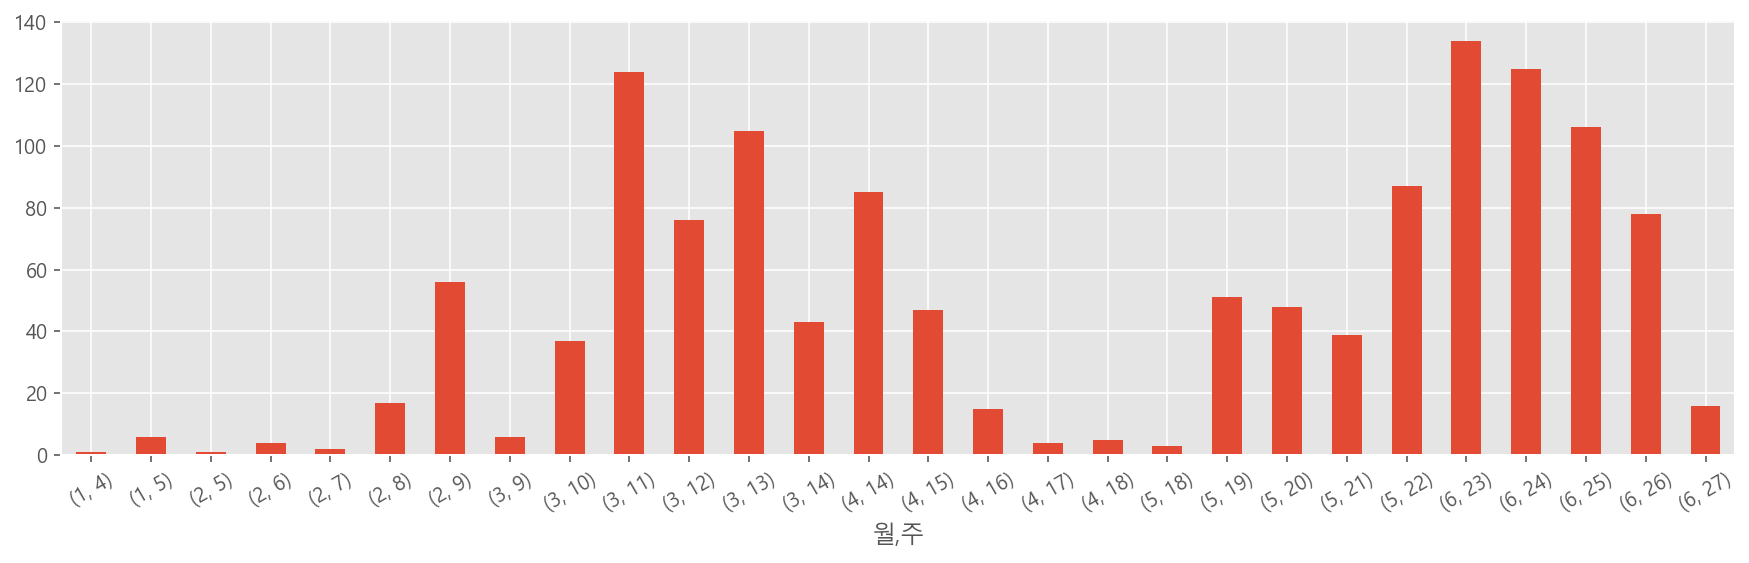

In [40]:
month_weekly_case.plot.bar(figsize=(15,4), rot =30)


<AxesSubplot:>

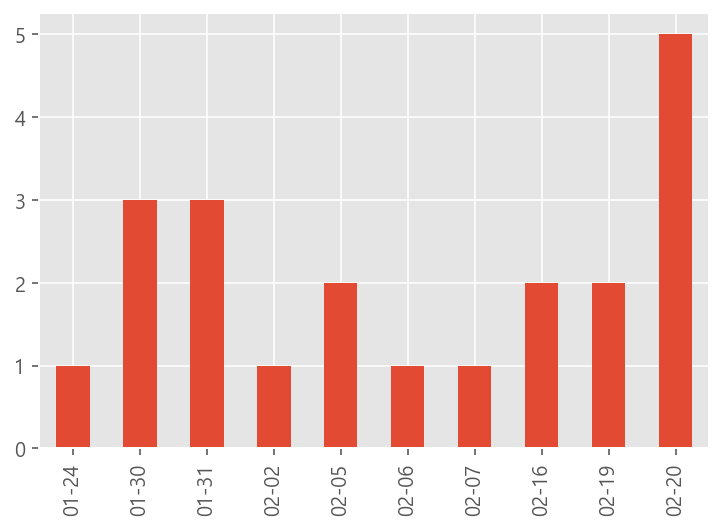

In [41]:
#모든 날짜를 행에 만들어 주기 (확진자가 없는 날의 데이터도 만들어 줍니다.)

day_count[:10].plot.bar() #없는 날짜는 표시가 안된다.

In [42]:
#iloc[list순서,인덱스 몇번째 인거]
#가져오는 방법이 2가지인데 %timeit 으로 검사해 보면 
#[,]이 [][]보다 저 빠르다
#그럼에따라 [,]을 사용한다.
first_day = df.iloc[-1,7]
%timeit first_day = df.iloc[-1,7]

125 µs ± 5.64 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [43]:
last_day=df.iloc[0,7]
%timeit last_day=df.iloc[0,7]

119 µs ± 11 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [44]:
#pd.date_reange를 통해 시작하는 날짜부터 끝나는 날짜까지의 
#DatetimeIndex를 만들고 days라는 변수에 저장합니다.
days = pd.date_range(first_day, last_day)
days[:5]

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28'],
              dtype='datetime64[ns]', freq='D')

In [45]:
#데이터 프레임을 만들어주는 방법 
#days.to_frame()
#pd.DateFrame({"컬럼명": days})
df_days = pd.DataFrame({"확진일자":days})#<여기 컬럼명 설정하는 방법
df_days.head()

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [46]:
daily_case = df["확진일자"].value_counts()
daily_case.head()

2020-03-10    46
2020-06-12    30
2020-06-06    29
2020-06-05    27
2020-03-09    26
Name: 확진일자, dtype: int64

In [47]:
df_daily_case = daily_case.to_frame()
df_daily_case.columns = ["확진수"]
df_daily_case.head()

,확진수
2020-03-10,46
2020-06-12,30
2020-06-06,29
2020-06-05,27
2020-03-09,26


In [48]:
#merge를 통해 전체 확진일자 만들기
#두개의 데이터 프레임을 합치는 것.

all_day = df_days.merge(df_daily_case, left_on="확진일자", right_on=df_daily_case.index, how = "left")
all_day

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN
...,...,...
154,2020-06-26,17.0
155,2020-06-27,14.0
156,2020-06-28,7.0
157,2020-06-29,8.0


In [49]:
#누적 확진자 수 구하기
#결측치에 0으로 채우는 방법(fillna(0)) : all_day["확진수"].fillna(0)
all_day["누적확진"] = all_day["확진수"].fillna(0).cumsum() #cumsum누적해서 더하게 된다
all_day

,확진일자,확진수,누적확진
0,2020-01-24,1.0,1.0
1,2020-01-25,NaN,1.0
2,2020-01-26,NaN,1.0
3,2020-01-27,NaN,1.0
4,2020-01-28,NaN,1.0
...,...,...,...
154,2020-06-26,17.0,1284.0
155,2020-06-27,14.0,1298.0
156,2020-06-28,7.0,1305.0
157,2020-06-29,8.0,1313.0


In [50]:
#연도를 제외하고 월-일로 "일자" 컬럼 만들기
all_day["일자"] = all_day["확진일자"].astype(str).map(lambda x : x[-5:] ) #슬라이싱으로 데이터를 가져올꺼라 str로 변환해 준다.
#.map(lambda x : x[-5:])  슬라이싱 (년도 빼기)
all_day.head()

,확진일자,확진수,누적확진,일자
0,2020-01-24,1.0,1.0,01-24
1,2020-01-25,NaN,1.0,01-25
2,2020-01-26,NaN,1.0,01-26
3,2020-01-27,NaN,1.0,01-27
4,2020-01-28,NaN,1.0,01-28


In [51]:
cum_day = all_day[["일자","확진수","누적확진"]]
#Pandas에서 그리기 쉽게 일자를 x축에 만들어 주기
cum_day = cum_day.set_index("일자")
cum_day

,확진수,누적확진
일자,,
01-24,1.0,1.0
01-25,NaN,1.0
01-26,NaN,1.0
01-27,NaN,1.0
01-28,NaN,1.0
...,...,...
06-26,17.0,1284.0
06-27,14.0,1298.0
06-28,7.0,1305.0


<AxesSubplot:xlabel='일자'>

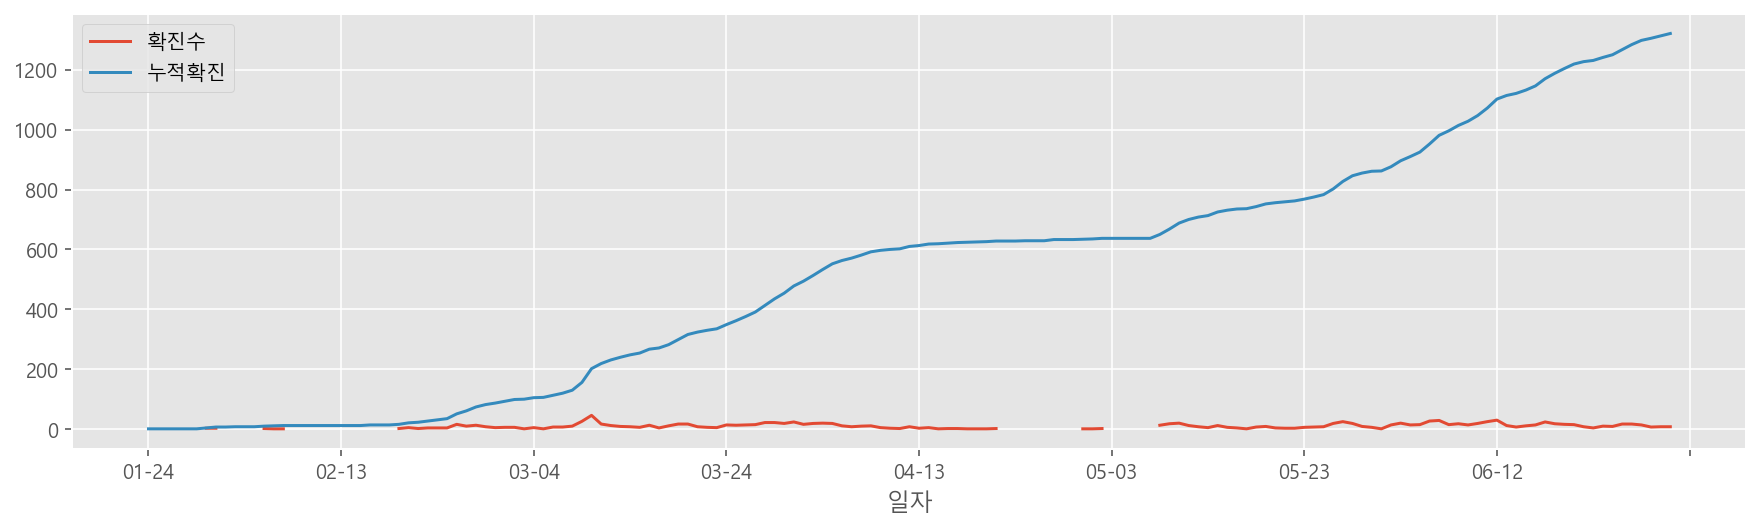

In [52]:
#데이터 프레임으로 그리기   ##累计确诊病例数 
                            ##确诊数
#데이터 프레임으로 확진수와 누적확진을 선그래프로 그립니다. 
cum_day.plot(figsize=(15,4))

<AxesSubplot:xlabel='일자'>

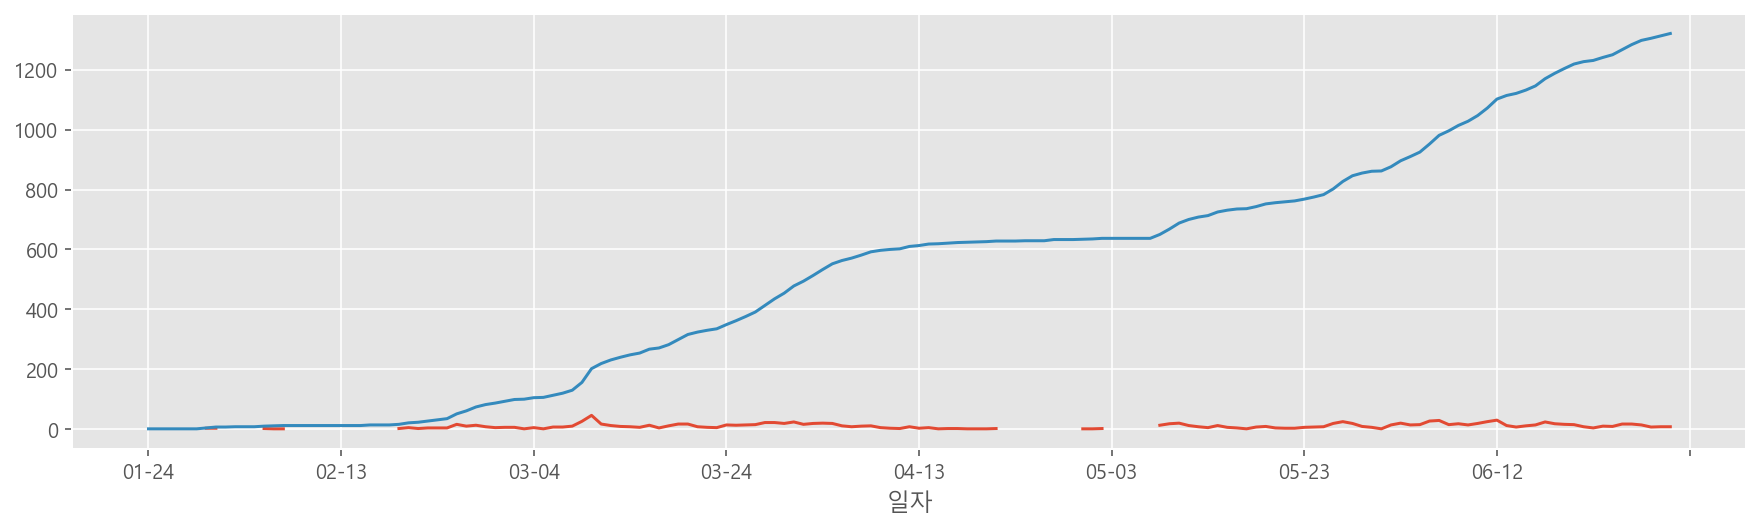

In [53]:
#시리즈로 2개의 그래프 그리기
cum_day["확진수"].plot()
cum_day["누적확진"].plot(figsize=(15,4))

<AxesSubplot:xlabel='일자'>

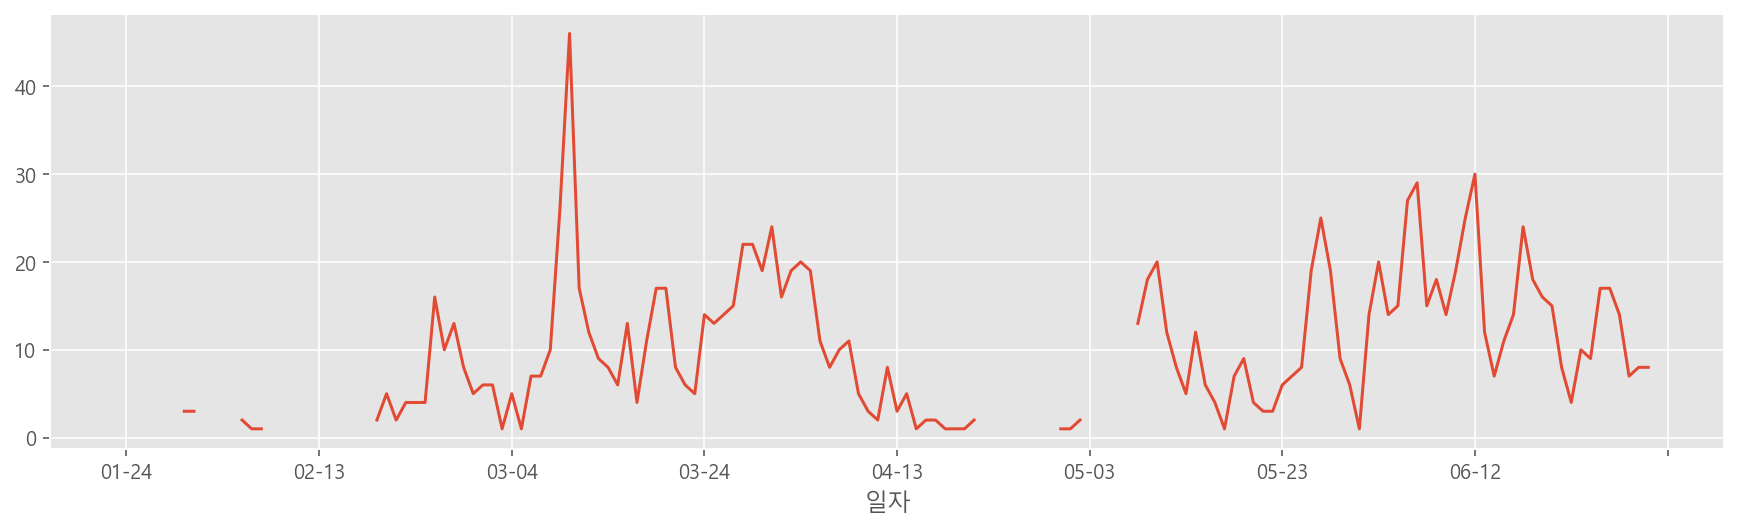

In [54]:
#확지수만 따로 그리기
cum_day["확진수"].plot(figsize=(15,4))

<AxesSubplot:xlabel='일자'>

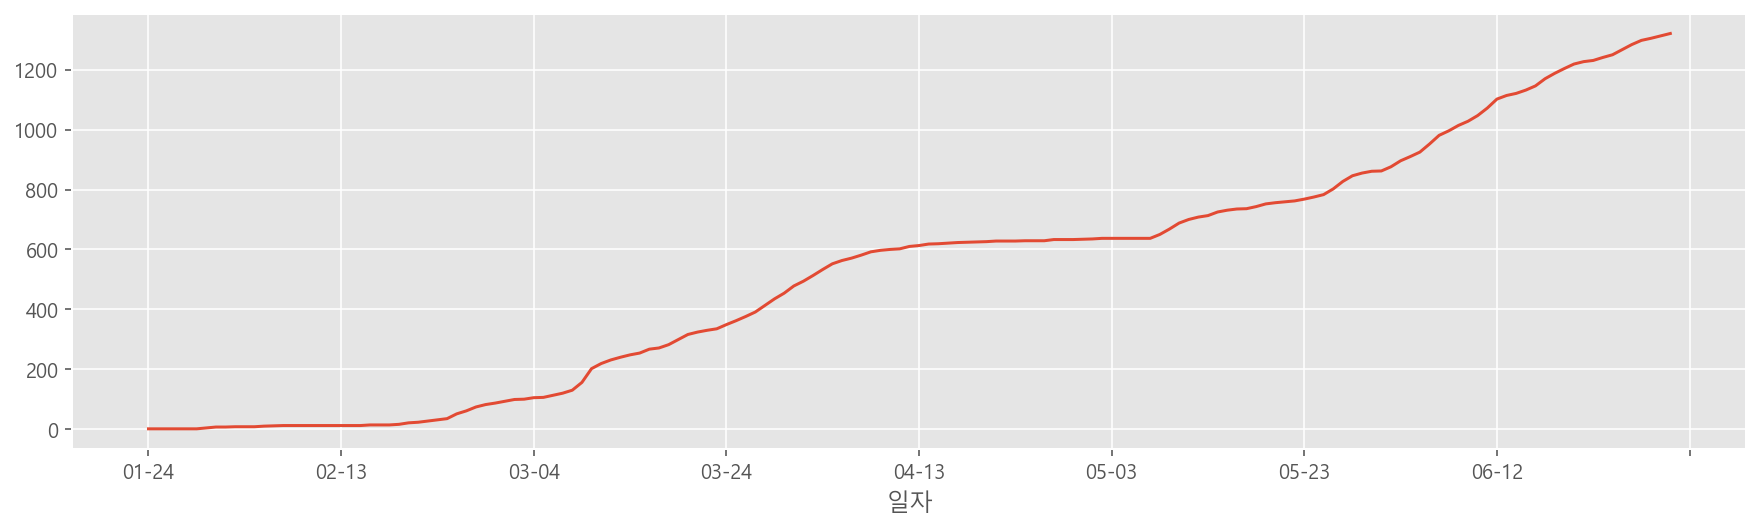

In [55]:
#누적 확진만 그리기
cum_day["누적확진"].plot(figsize=(15,4))

<AxesSubplot:xlabel='일자'>

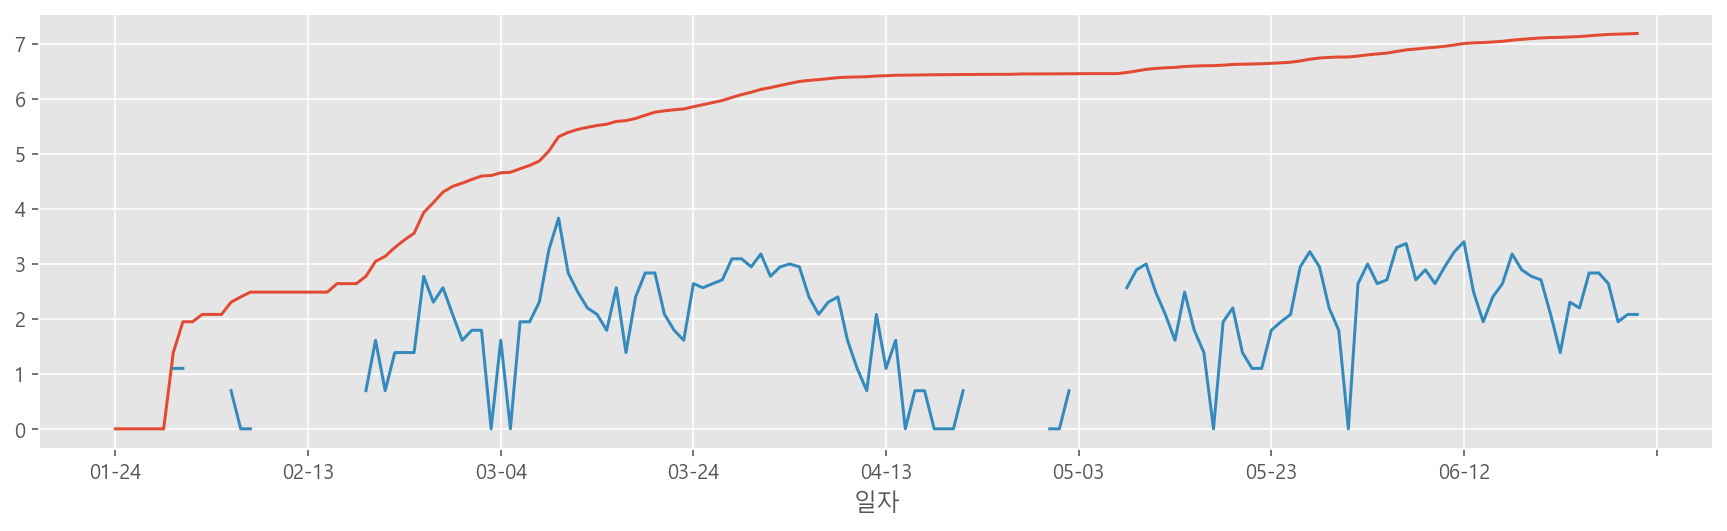

In [56]:
#로그 스케일
#(차이가 너무 커서 그래프가 자세히 보이지 않을때 로그스케일로 표현하면 차이가 큰 값의 스케일을 조정해주게 됩니다.)

np.log(cum_day["누적확진"]).plot(figsize=(15,4))
np.log(cum_day["확진수"]).plot()


In [57]:
#cum_day
all_day["확진월"] = all_day["확진일자"].dt.month
all_day["확진요일"] = all_day["확진일자"].dt.dayofweek
all_day.head()

,확진일자,확진수,누적확진,일자,확진월,확진요일
0,2020-01-24,1.0,1.0,01-24,1,4
1,2020-01-25,NaN,1.0,01-25,1,5
2,2020-01-26,NaN,1.0,01-26,1,6
3,2020-01-27,NaN,1.0,01-27,1,0
4,2020-01-28,NaN,1.0,01-28,1,1


In [58]:
all_day_week = all_day.groupby(["확진월","확진요일"])["확진수"].sum() #按照星期 分析确诊数
#.unstack()하면 행과 열이 만들어진다.
all_day_week = all_day_week.unstack().astype(int)
#astype(int) : 소수점을 제외하고 보여준다.
all_day_week

확진요일,0,1,2,3,4,5,6
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,66,66,75,90,70,37


In [59]:
#숫자로 표현된 요일을 문자로 바꿔주기 위해 split을 통해 문자를 리스트로 바꾸어 준다.
dayofweek = "월 화 수 목 금 토 일"
dayofweek = dayofweek.split()
dayofweek

['월', '화', '수', '목', '금', '토', '일']

In [60]:
all_day_week.columns = dayofweek
all_day_week

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,66,66,75,90,70,37


In [61]:
#style.background_gradient(cmap="Blues") : 많은 날에 그라데이션 넣어 강조해주기
all_day_week.style.background_gradient(cmap="Blues")

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,66,66,75,90,70,37


In [62]:
#거주지별 확진자
df 

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-,2020-06-30,6,27,06-30
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,06-30
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,06-30
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,06-30
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,06-30
...,...,...,...,...,...,...,...,...,...,...,...
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원),2020-01-31,1,5,01-31
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,1,5,01-30
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30


In [63]:
#거주지(구별)확진자의 빈도수를 구하고 시각화 합니다.  ##各地区确诊病例数比较！
gu_count = df["거주지"].value_counts()
gu_count.head()

관악구    117
구로구     86
강남구     83
강서구     78
양천구     70
Name: 거주지, dtype: int64

<AxesSubplot:>

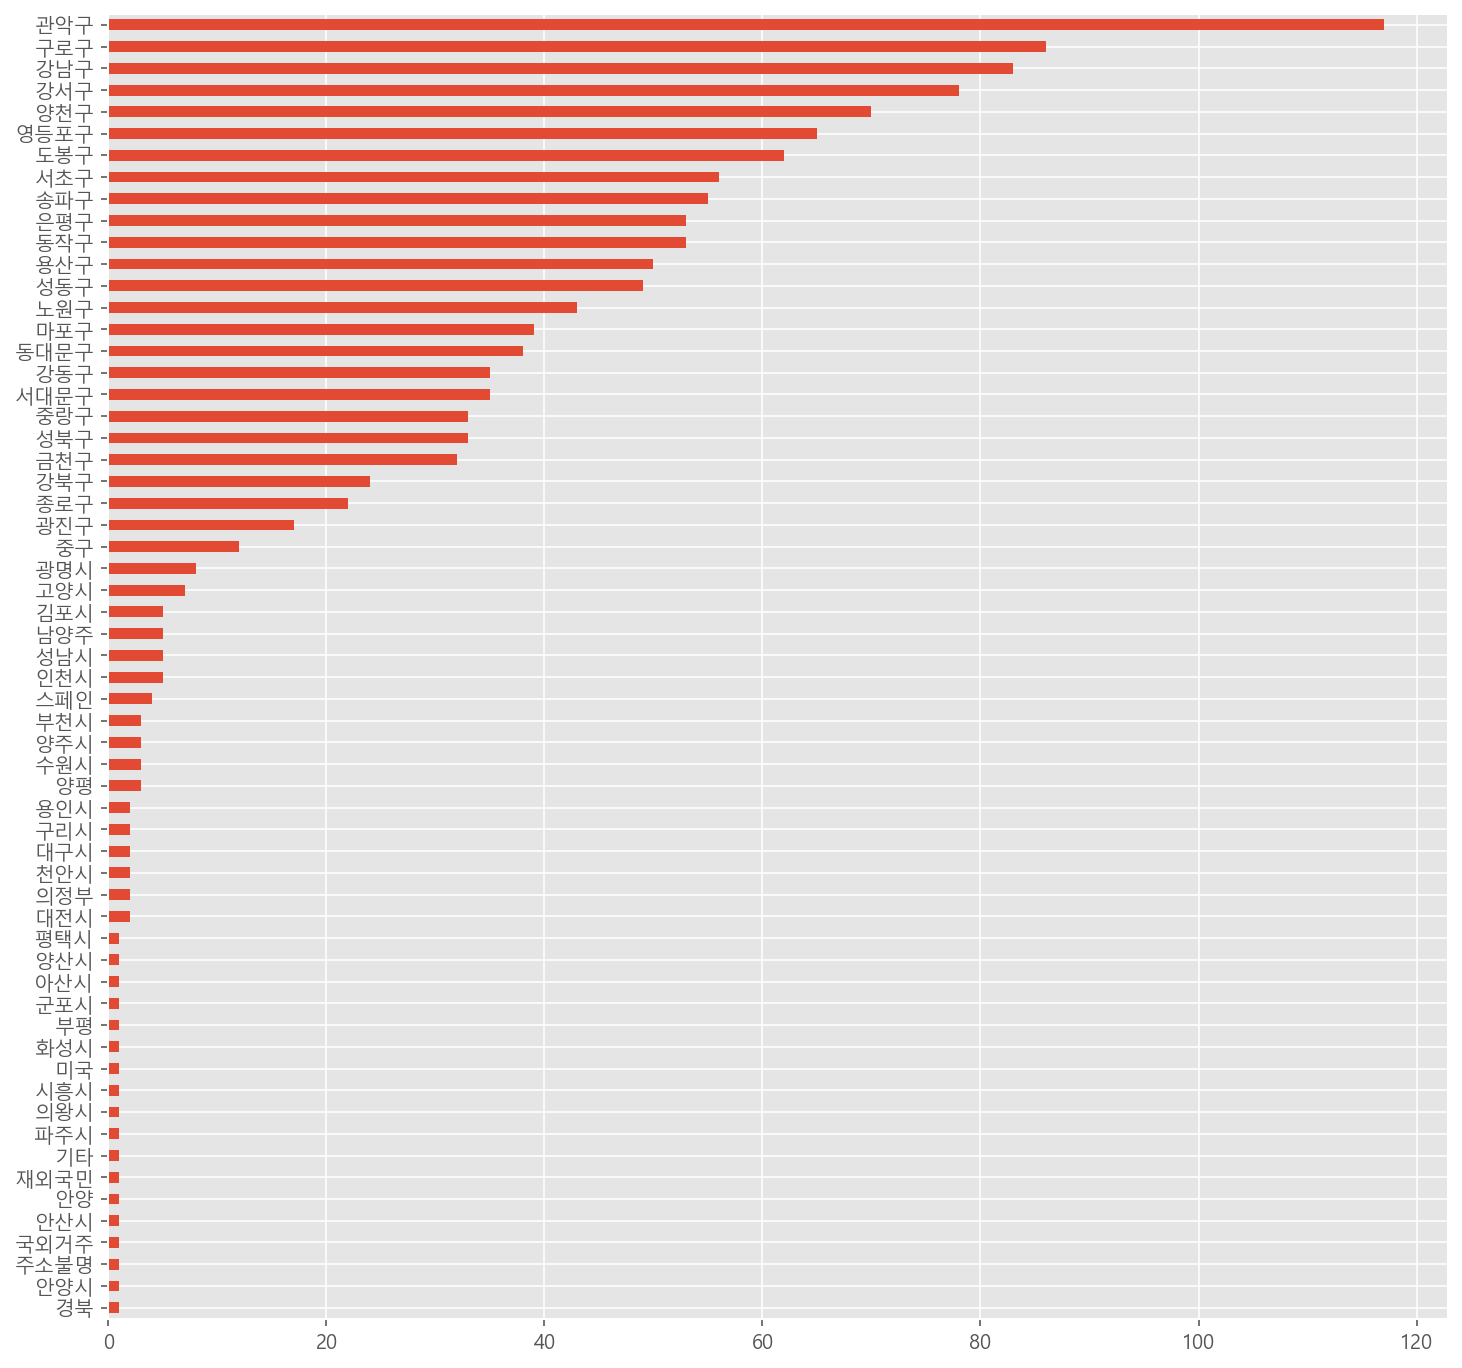

In [64]:
gu_count.sort_values().plot.barh(figsize=(12,12))
#barh 하면 x,y축이 바뀐다.
#빈도순으로 나타내려면 sort_vaules


In [65]:
gu = gu_count[:25].index
gu

Index(['관악구', '구로구', '강남구', '강서구', '양천구', '영등포구', '도봉구', '서초구', '송파구', '은평구',
       '동작구', '용산구', '성동구', '노원구', '마포구', '동대문구', '강동구', '서대문구', '중랑구', '성북구',
       '금천구', '강북구', '종로구', '광진구', '중구'],
      dtype='object')

In [66]:
set(gu_count.index) - set(gu)

{'경북',
 '고양시',
 '광명시',
 '구리시',
 '국외거주',
 '군포시',
 '기타',
 '김포시',
 '남양주',
 '대구시',
 '대전시',
 '미국',
 '부천시',
 '부평',
 '성남시',
 '수원시',
 '스페인',
 '시흥시',
 '아산시',
 '안산시',
 '안양',
 '안양시',
 '양산시',
 '양주시',
 '양평',
 '용인시',
 '의왕시',
 '의정부',
 '인천시',
 '재외국민',
 '주소불명',
 '천안시',
 '파주시',
 '평택시',
 '화성시'}

In [67]:
# 구를 전처리 하기 쉽게 컬럼으로 변환하기 위해 reset_index로 변환합니다.
#데이터 프레임으로 만들어주는 방법들
#gu_count.to_frame()
#pd.DataFrame(gu_count)
df_gu = gu_count.reset_index()
df_gu.columns = ["구","확진수"]
df_gu.head()

,구,확진수
0,관악구,117
1,구로구,86
2,강남구,83
3,강서구,78
4,양천구,70


In [68]:
#서울에서 확진 받은 사람 중 서울 vs 타 지역을 비교해 보자
#"지역"이라는 새로운 컬럼을 만들어서 "타지역"이라는 값을 넣어줍니다
#.loc[행인덱스]
#.loc[행, 열]
#.loc[조건,열]
df_gu[~df_gu["구"].isin(gu)]  #타지역 볼때 ~붙여주면 끝

,구,확진수
25,광명시,8
26,고양시,7
27,남양주,5
28,김포시,5
29,성남시,5
30,인천시,5
31,스페인,4
32,부천시,3
33,양주시,3
34,수원시,3


In [69]:
df.loc[~df["거주지"].isin(gu)]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
8,1313,12822,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,06-29
10,1311,12784,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,06-29
16,1305,12754,6.28.,남양주,-,확인 중,서울의료원,2020-06-28,6,26,06-28
57,1264,12593,6.25.,광명시,-,왕성교회 관련,타시도 이관,2020-06-25,6,26,06-25
72,1249,12557,6.24.,양산시,-,확인 중,서울의료원,2020-06-24,6,26,06-24
...,...,...,...,...,...,...,...,...,...,...,...
1282,39,907,2.25.,평택시,-,확인중,타시도 이관(퇴원),2020-02-25,2,9,02-25
1286,35,847,2.25.,김포시,-,확인중,타시도 이관(퇴원),2020-02-25,2,9,02-25
1303,18,111,2.20.,대구시,-,대구 거주자,국립중앙의료원(퇴원),2020-02-20,2,8,02-20
1309,12,24,2.7.,아산시,우한교민,해외 접촉,국립중앙의료원(퇴원),2020-02-07,2,6,02-07


In [70]:
df.loc[df["거주지"].isin(gu),"지역"] = df["거주지"]
#df.loc[~df["거주지"].isin(gu)]
#df.loc[df["지역"].isnull(),"지역"]="타지역"
#주석처리 :  ctrl + /
df["지역"] = df["지역"].fillna("타지역")
df["지역"].unique()

array(['영등포구', '관악구', '금천구', '마포구', '타지역', '은평구', '노원구', '서초구', '송파구',
       '구로구', '용산구', '양천구', '강남구', '동대문구', '중구', '동작구', '광진구', '중랑구',
       '강서구', '종로구', '도봉구', '강동구', '성북구', '성동구', '서대문구', '강북구'],
      dtype=object)

In [71]:
del df["지역"] # del :특정 컬럼을 지우기 
df["지역"] = df["거주지"].map(lambda x : x if x in gu else "타지역")
df[["거주지","지역"]].head()

,거주지,지역
0,영등포구,영등포구
1,관악구,관악구
2,영등포구,영등포구
3,관악구,관악구
4,관악구,관악구


In [72]:
#"지역" 컬럼으로 확진자 빈도수를 구합니다.
gu_etc_count = df["지역"].value_counts()
gu_etc_count

관악구     117
구로구      86
강남구      83
타지역      81
강서구      78
양천구      70
영등포구     65
도봉구      62
서초구      56
송파구      55
은평구      53
동작구      53
용산구      50
성동구      49
노원구      43
마포구      39
동대문구     38
강동구      35
서대문구     35
중랑구      33
성북구      33
금천구      32
강북구      24
종로구      22
광진구      17
중구       12
Name: 지역, dtype: int64

<AxesSubplot:>

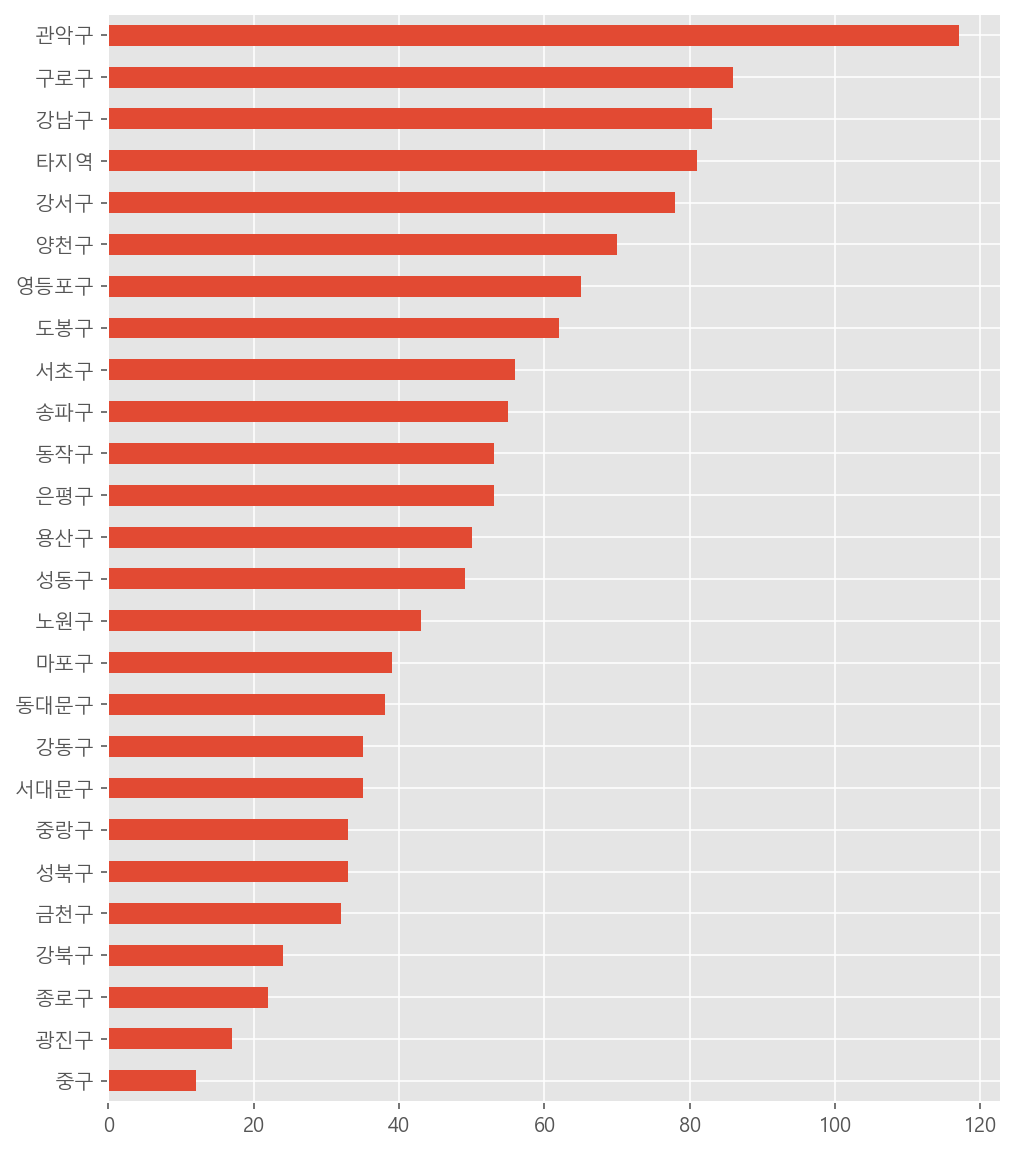

In [73]:
gu_etc_count.sort_values().plot.barh(figsize=(8,10))
#sort_index()
#sort_values()
#어떤거 사용할지 생각하기

In [74]:
#접촉력
#접촉력 빈도수를 구합니다.
df["접촉력"].value_counts().head(20)


해외 접촉 추정       280
이태원 클럽 관련      139
리치웨이 관련        119
확인 중            99
구로구 콜센터 관련      60
요양시설 관련         43
양천구 운동시설 관련     43
구로구 교회 관련       41
확인중             39
타시도 확진자 접촉      38
수도권 개척교회 관련     37
콜센터직원 접촉        37
동대문구 관련         28
왕성교회 관련         25
부천시 쿠팡 관련       24
해외 접촉           22
은평구 병원 관련       14
kb 생명보험 관련      13
성동구 아파트 관련      13
강남구 역삼동 모임       8
Name: 접촉력, dtype: int64

In [75]:
df["접촉력"].unique()

array(['영등포구 확진자 접촉', '확인 중', '강남구 역삼동 모임', '왕성교회 관련', '대전 꿈꾸는 교회',
       '타시도 확진자 접촉', '리치웨이 관련', '해외 접촉 추정', '용산구 확진자 접촉', '구로구 확진자 접촉',
       '관악구 확진자 접촉', '동작구 확진자 접촉', '금천구 확진자 접촉', '강서구 확진자 접촉', '요양시설 관련',
       '강동구 확진자 접촉', '시청역 관련', '대자연코리아', '의왕 물류센터 관련', '금천구 도정기 회사 관련',
       '양천구 운동시설 관련', '은평구 확진자 접촉', '대전 다단계 관련', '오렌지라이프 관련',
       '수도권 개척교회 관련', '서초구 확진자 접촉', '타시도 확진자 접촉자', '연아나뉴스클래스 관련',
       '한국대학생선교회 관련', '해외접촉 추정', 'kb 생명보험 관련', '부천시 쿠팡 관련', '이태원 클럽 관련',
       '용인 형제 관련', '삼성화재 관련', '서초구 가족 관련', '안양군포 목회자 관련', '서초구 가족관련',
       '영등포 학원 관련', '강남구 동인교회 관련', '원어성경연구회 관련', '#11196 접촉', '삼성서울병원 관련',
       '#10054 접촉', '#9800 접촉', '#10044 접촉', '#9641 접촉', '구로구 교회 관련',
       '#10407 접촉', '#10015 접촉', '#9364 접촉', '#10377 접촉', '#9287 접촉',
       '#10142 접촉', '#9912 접촉', '#9765 접촉', '#10115 접촉', '타시도 확진자 접촉(추정)',
       '#8063 접촉', '#10084 접촉', '#8601 접촉', '#8717 접촉', '#9946 접촉',
       '콜센터직원 접촉', '#8271 접촉', '#8669 접촉', '#9734 접촉', '#9621 접촉',
       '#9572 접촉',

In [76]:
df.loc[df["접촉력"].str.contains("확인"),"접촉력"].unique()

array(['확인 중', '확인중'], dtype=object)

In [77]:
df.loc[df["접촉력"].str.contains("확인"),"접촉력"] = "확인 중"

In [78]:
df.loc[df["접촉력"].str.contains("확인"),"접촉력"].unique()

array(['확인 중'], dtype=object)

<AxesSubplot:>

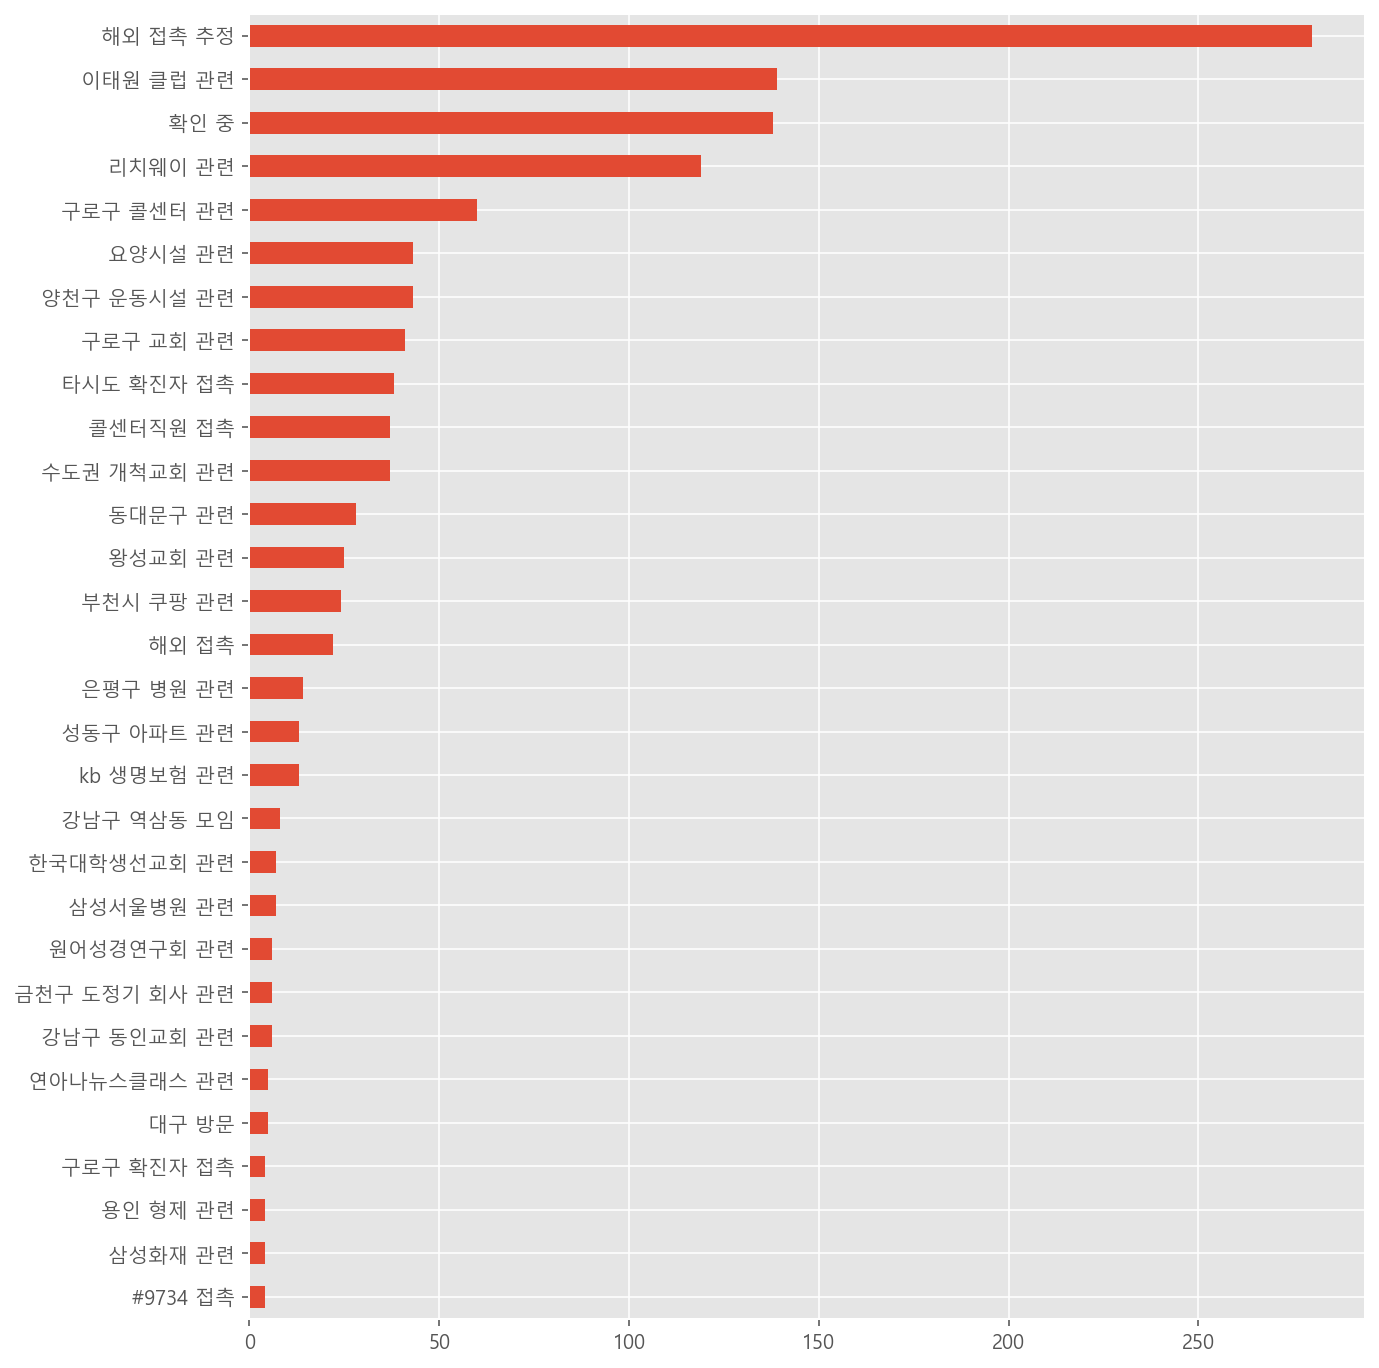

In [79]:
contact_count = df["접촉력"].value_counts()
contact_count_top = contact_count.sort_values().tail(30)
contact_count_top.plot.barh(figsize=(10,12))

In [80]:
#상위 15개만 구합니다.
top_contact = contact_count_top.tail(15)
top_contact.index

Index(['해외 접촉', '부천시 쿠팡 관련', '왕성교회 관련', '동대문구 관련', '수도권 개척교회 관련', '콜센터직원 접촉',
       '타시도 확진자 접촉', '구로구 교회 관련', '양천구 운동시설 관련', '요양시설 관련', '구로구 콜센터 관련',
       '리치웨이 관련', '확인 중', '이태원 클럽 관련', '해외 접촉 추정'],
      dtype='object')

In [81]:
#위에서 구한 top_contact에 해당되는 데이터만 isin으로 가져온다.

top_group = df[df["접촉력"].isin(top_contact.index)]
top_group.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,06-30,관악구
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,06-30,영등포구
6,1315,12810,6.30.,금천구,-,왕성교회 관련,서남병원,2020-06-30,6,27,06-30,금천구
8,1313,12822,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,06-29,타지역
9,1312,12789,6.29.,은평구,-,확인 중,서북병원,2020-06-29,6,27,06-29,은평구


In [82]:
#groupby, crosstab, pivot_table 3가지 방법이 있다.
top_group.groupby(["접촉력","월"])["연번"].count().unstack().fillna(0).astype(int)

월,1,2,3,4,5,6
접촉력,,,,,,
구로구 교회 관련,0,0,35,6,0,0
구로구 콜센터 관련,0,0,60,0,0,0
동대문구 관련,0,0,28,0,0,0
리치웨이 관련,0,0,0,0,0,119
부천시 쿠팡 관련,0,0,0,0,19,5
수도권 개척교회 관련,0,0,0,0,0,37
양천구 운동시설 관련,0,0,0,0,0,43
왕성교회 관련,0,0,0,0,0,25
요양시설 관련,0,0,0,0,0,43


In [83]:
df[df["접촉력"].str.contains("이태원") & (df["월"]==6)] #특정장소에서 특정월의 확진자만 보고 싶을때는 str.contains 와 and를 이용하여 조사한다.

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역
341,980,11786,6.06.,성동구,-,이태원 클럽 관련,서울의료원(퇴원),2020-06-06,6,23,06-06,성동구
356,965,11741,6.06.,은평구,-,이태원 클럽 관련,보라매병원(퇴원),2020-06-06,6,23,06-06,은평구
365,956,11730,6.06.,성동구,-,이태원 클럽 관련,서울대병원,2020-06-06,6,23,06-06,성동구
372,949,11775,6.05.,은평구,-,이태원 클럽 관련,국립중앙의료원(퇴원),2020-06-05,6,23,06-05,은평구
387,934,11687,6.05.,성동구,-,이태원 클럽 관련,보라매병원(퇴원),2020-06-05,6,23,06-05,성동구
445,876,11535,6.01.,강동구,-,이태원 클럽 관련,서울의료원(퇴원),2020-06-01,6,23,06-01,강동구


In [84]:
df_unknown = df[df["접촉력"]=="확인 중"]
df_unknown.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,06-30,관악구
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,06-30,영등포구
8,1313,12822,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,06-29,타지역
9,1312,12789,6.29.,은평구,-,확인 중,서북병원,2020-06-29,6,27,06-29,은평구
10,1311,12784,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,06-29,타지역


<AxesSubplot:xlabel='월,주'>

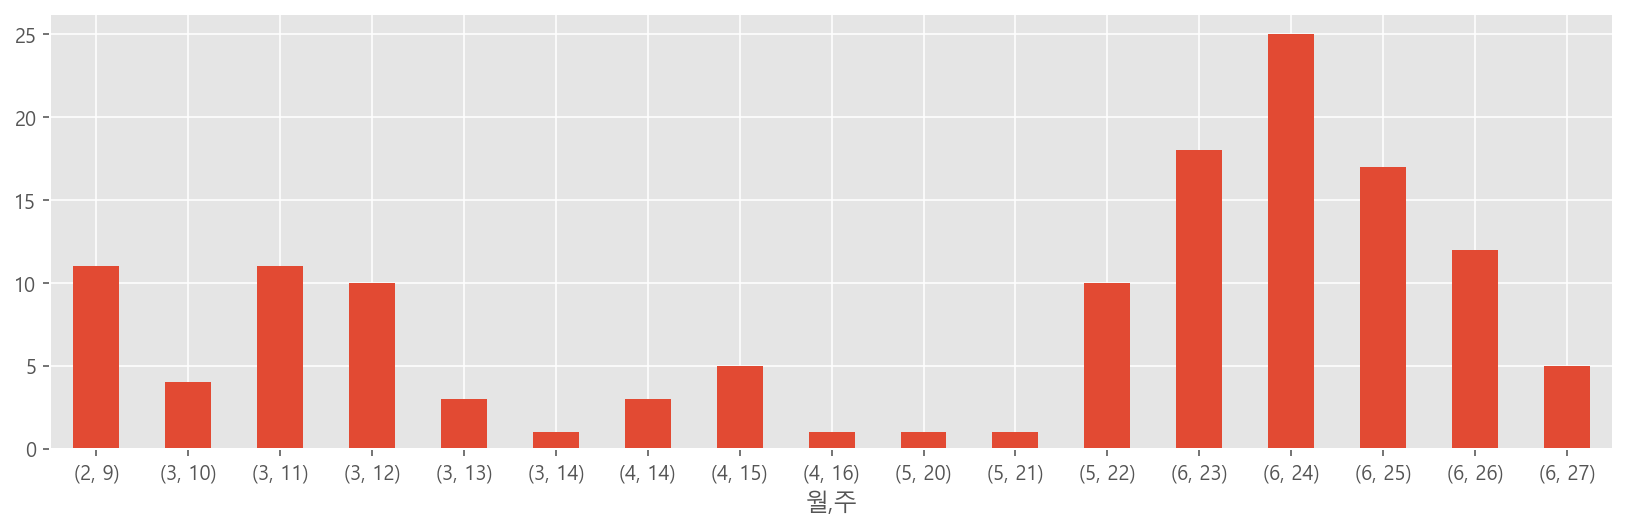

In [85]:
#감염 경로가 "확인 중"
unknown_weekly_case = df_unknown.groupby(["월","주"])["연번"].count()
unknown_weekly_case.plot.bar(figsize=(14,4),rot=0)

In [86]:
#전체 확진수를 value_counts 로 구하고 데이터프레임 형태로 만든다.

all_weekly_case = df["주"].value_counts().to_frame()
all_weekly_case.columns = ["전체확진자수"]
all_weekly_case.head()


,전체확진자수
23,134
14,128
24,125
11,124
25,106


In [87]:
unknown_weekly_case = df_unknown["주"].value_counts().to_frame()
unknown_weekly_case.columns = ["불명확진자"]
unknown_weekly_case

,불명확진자
24,25
23,18
25,17
26,12
9,11
11,11
12,10
22,10
15,5
27,5


In [88]:
#위에 두개 합하기 merge이용 #시리즈를 데이터 프레임형태로 바꾼 이유은
#데이터프레임형태일 떄만 merge를 이용하여 합할수 있기 떄문이다.
unknown_case = all_weekly_case.merge(unknown_weekly_case,left_index=True, 
                      right_index=True)
unknown_case = unknown_case.sort_index()
unknown_case 

,전체확진자수,불명확진자
9,62,11
10,37,4
11,124,11
12,76,10
13,105,3
14,128,4
15,47,5
16,15,1
20,48,1
21,39,1


<AxesSubplot:>

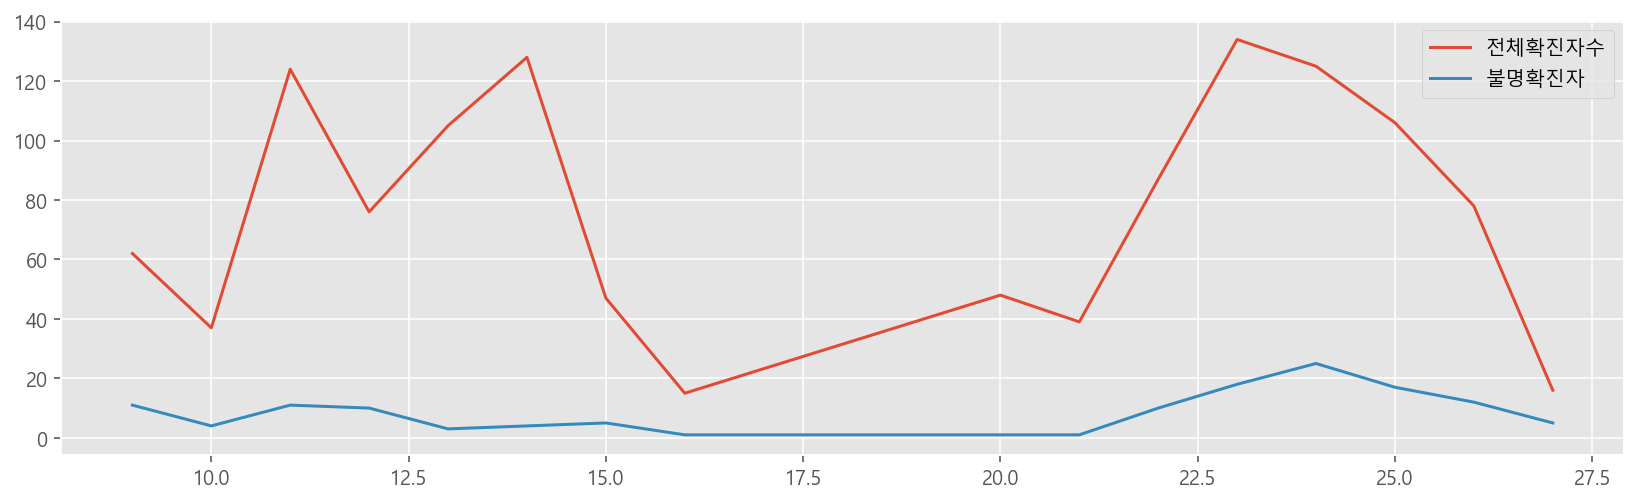

In [89]:
#시각화
unknown_case.plot(figsize=(14,4))

<AxesSubplot:>

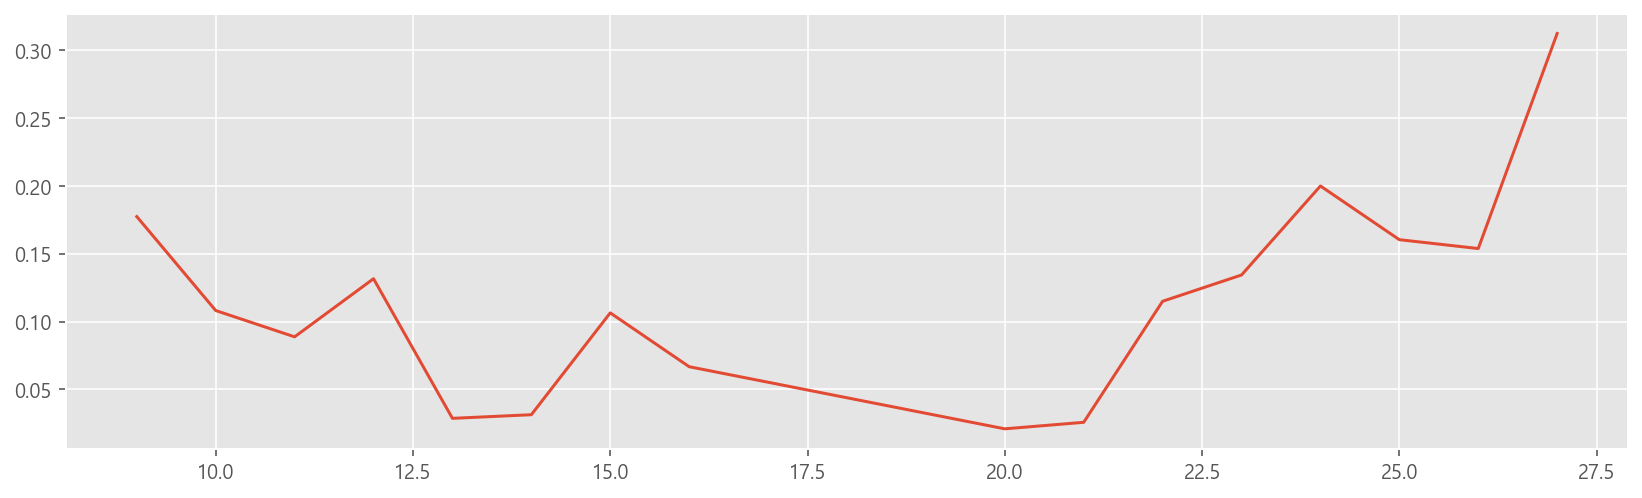

In [90]:
#불명 확진수의 비율을 알아보기
unknown_case["확인중비율"] = (unknown_case["불명확진자"] / unknown_case["전체확진자수"])
unknown_case["확인중비율"].plot(figsize=(14,4))

문자열 바꾸기 : re.sub("규칙", "패턴", "데이터")

In [91]:
#정규표현식 문자열 패턴

import re
#정규표현식 라이브러리를 불러옵니다.
#숫자외의 데이터는 제거하는 정규표현식
# 7265 접촉(추정)
def get_number(text):
    return re.sub("[^0-9]","",text) #re.sub("규칙","어떻게 바꿀껀지","7265 접촉(추정)") 
get_number("#7265 접촉(추정)")

'7265'

In [92]:
# 함수를 통해 숫자외의 문자를 제거하는 get_number함수 만들기
df["접촉번호"] = df["접촉력"].map(get_number) #함수를 map을 통해 접촉번호를 구합니다.
contact = df["접촉번호"].value_counts().reset_index()  #reset_index() : DataFrame으로 만들어주는 또 다른 방법
contact.head()


,index,접촉번호
0,,1236
1,6,4
2,9734,4
3,8271,3
4,8486,3


In [93]:
df_contact = contact.drop(0) #첫번째 인덱스를 제거한다.
df_contact = df_contact.head(10)
df_contact

,index,접촉번호
1,6,4
2,9734,4
3,8271,3
4,8486,3
5,8791,3
6,780,3
7,794,2
8,6832,2
9,10044,2
10,8669,2


In [94]:
#상위 10개의 접촉번호를 구해서 top_contact_no 변수에 할당하고 재사용합니다.
top_contact_no = df_contact["index"]
top_contact_no

1         6
2      9734
3      8271
4      8486
5      8791
6       780
7       794
8      6832
9     10044
10     8669
Name: index, dtype: object

In [95]:
#contact의 환자번호와 df의 접촉번호를 merger 합니다.
df[df["접촉번호"].isin(top_contact_no)]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역,접촉번호
708,613,10588,4.13.,성북구,-,#10044 접촉,적십자병원(퇴원),2020-04-13,4,16,04-13,성북구,10044
788,533,10222,4.3.,동작구,-,#10044 접촉,보라매병원(퇴원),2020-04-03,4,14,04-03,동작구,10044
830,491,10021,4.01.,영등포구,-,#8271 접촉,서울의료원(퇴원),2020-04-01,4,14,04-01,영등포구,8271
839,482,9939,4.01.,동작구,-,#8669 접촉,보라매병원(퇴원),2020-04-01,4,14,04-01,동작구,8669
848,473,9870,3.31.,수원시,-,#9734 접촉,타시도 이관(사망),2020-03-31,3,14,03-31,타지역,9734
849,472,9800,3.31.,중구,-,#9734 접촉,보라매병원(퇴원),2020-03-31,3,14,03-31,중구,9734
874,447,9725,3.30.,중구,-,#9734 접촉,보라매병원(퇴원),2020-03-30,3,14,03-30,중구,9734
879,442,9706,3.30.,서초구,-,#9734 접촉,서울의료원(퇴원),2020-03-30,3,14,03-30,서초구,9734
918,403,9571,3.28.,동작구,-,#8669 접촉,보라매병원(퇴원),2020-03-28,3,13,03-28,동작구,8669
940,381,9427,3.27.,중랑구,-,#8791 접촉,서울의료원(퇴원),2020-03-27,3,13,03-27,중랑구,8791


조치사항


In [96]:
df["조치사항"].value_counts()

서울의료원(퇴원)            339
보라매병원(퇴원)            186
서남병원(퇴원)             176
생활치료센터(퇴원)            79
서남병원                  67
                    ... 
순천향서울병원                1
서울대학교병원(사망)            1
서울백병원                  1
한양대병원/국립중앙의료원(퇴원)      1
건국대병원(퇴원)              1
Name: 조치사항, Length: 75, dtype: int64

In [98]:
df["퇴원"] = df["조치사항"].str.contains("퇴원")  #퇴원 인것만 true로 표시된다.
df["사망"] =  df["조치사항"].str.contains("사망")
df["병원"] = df["조치사항"].str.replace("\(퇴원\)","")
df["병원"] = df["병원"].str.replace("\(사망\)")
df

<ipython-input-98-b9b017fb06c5>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["병원"] = df["조치사항"].str.replace("\(퇴원\)","")


TypeError: replace() missing 1 required positional argument: 'repl'

In [99]:
df["퇴원"].value_counts()

True     1026
False     295
Name: 퇴원, dtype: int64

In [100]:
df["퇴원"].value_counts(normalize=True)

True     0.776684
False    0.223316
Name: 퇴원, dtype: float64

In [101]:
#사망여부에 따른 빈도수를 구합니다.
df["사망"].value_counts()


False    1314
True        7
Name: 사망, dtype: int64

In [102]:
#사망 여부에 따른빈도수의 비율을 구합니다.
df["사망"].value_counts(normalize=True)*100

False    99.470098
True      0.529902
Name: 사망, dtype: float64

In [103]:
#데이터 수집 시점 기준 현재까지 입원해 잇는 확진자 중 가장 오래 입원해 있는 환자
df[(df["퇴원"] == False) &(df["사망"]== False) & (df["지역"] != "타지역")].tail(5)
#가장 오래 치료를 받고 있는 환자 top5

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,병원
519,802,11256,5.27.,강서구,-,부천시 쿠팡 관련,강북삼성병원,2020-05-27,5,22,05-27,강서구,,False,False,강북삼성병원
527,794,11242,5.26.,도봉구,-,원어성경연구회 관련,원자력병원,2020-05-26,5,22,05-26,도봉구,,False,False,원자력병원
570,751,11092,5.19.,강북구,-,삼성서울병원 관련,서울삼성병원,2020-05-19,5,21,05-19,강북구,,False,False,서울삼성병원
573,748,11093,5.19.,서초구,-,삼성서울병원 관련,서울삼성병원,2020-05-19,5,21,05-19,서초구,,False,False,서울삼성병원
621,700,10941,5.11.,양천구,-,이태원 클럽 관련,서북병원,2020-05-11,5,20,05-11,양천구,,False,False,서북병원


In [104]:
#병원

In [105]:
#describe로 요약
#count: 빈도수
#unique: 병원수
#top : 가장 많은 빈도로 등장하는 텍스트
#freq : 가장 많은 빈도의 횟수
df["병원"].describe()

count      1321
unique       50
top       서울의료원
freq        394
Name: 병원, dtype: object

<AxesSubplot:>

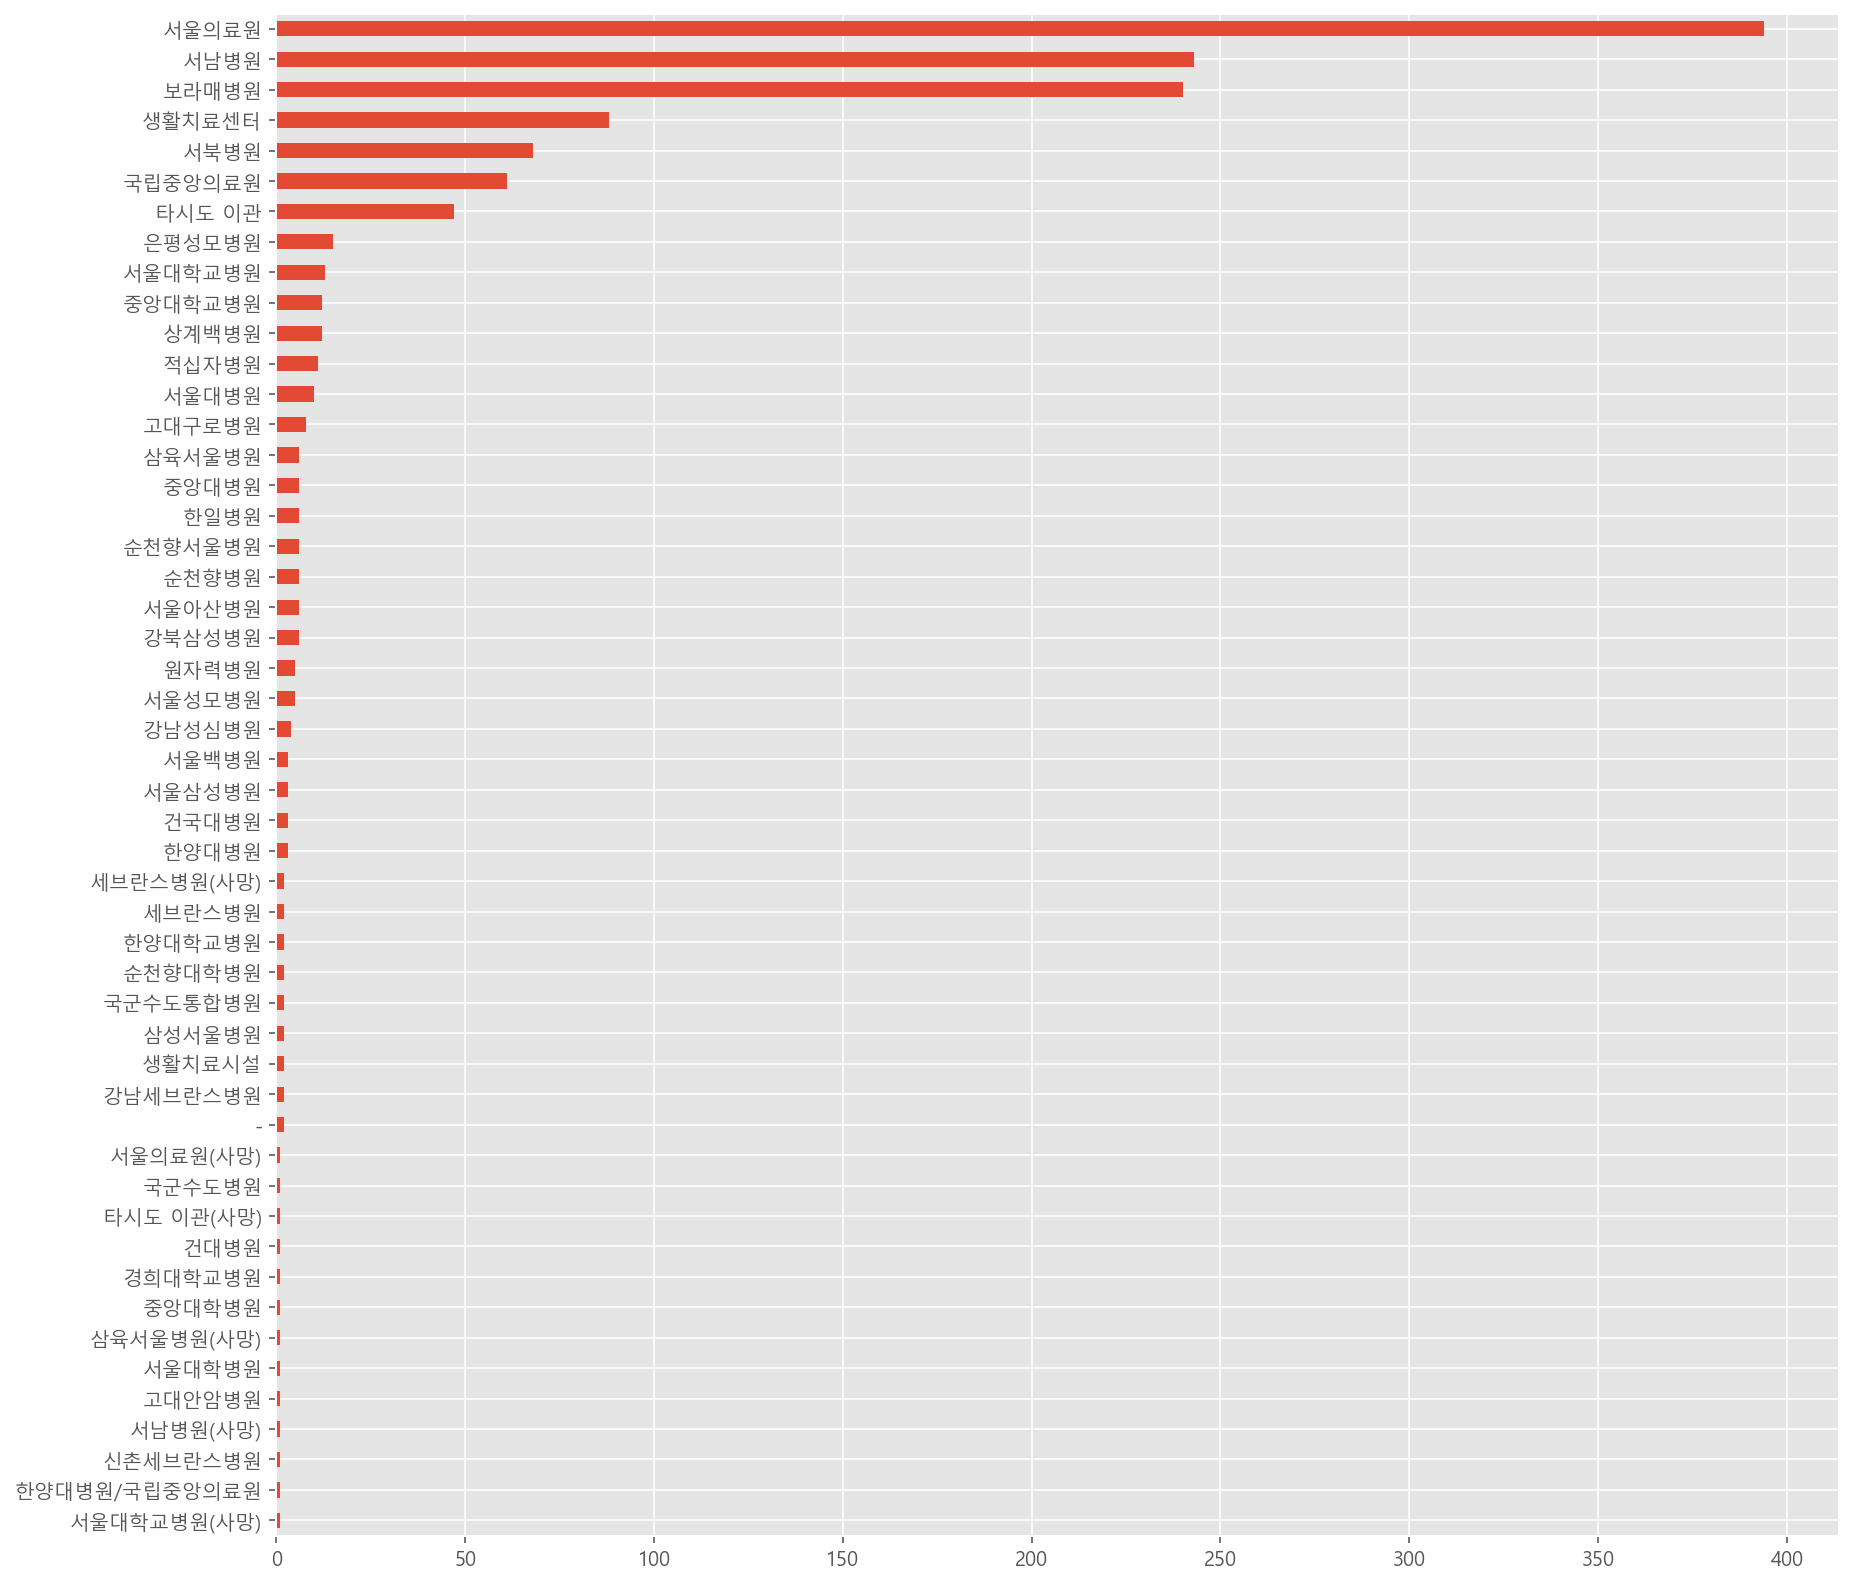

In [106]:
#병원의 빈도수를 구합니다.
hospital_count = df["병원"].value_counts()
hospital_count.sort_values().plot.barh(figsize=(14,14))

In [107]:
#입원환자가 많은 병원을 구합니다.
top_hospital_count = hospital_count.head(10)
top_hospital_index = top_hospital_count.index
top_hospital_index

Index(['서울의료원', '서남병원', '보라매병원', '생활치료센터', '서북병원', '국립중앙의료원', '타시도 이관',
       '은평성모병원', '서울대학교병원', '상계백병원'],
      dtype='object')

In [108]:
hospital_gu = df.groupby(["지역","병원"])["연번"].count().unstack() #두개의 멀티인덱스일때, 행과 열로 만들어 주고 싶으면 unstack을 이용한다.
hospital_gu.head()

병원,-,강남성심병원,강남세브란스병원,강북삼성병원,건국대병원,건대병원,경희대학교병원,고대구로병원,고대안암병원,국군수도병원,...,적십자병원,중앙대병원,중앙대학교병원,중앙대학병원,타시도 이관,타시도 이관(사망),한양대병원,한양대병원/국립중앙의료원,한양대학교병원,한일병원
지역,,,,,,,,,,,,,,,,,,,,,
강남구,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
강동구,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
강북구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
강서구,NaN,1.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
관악구,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,...,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN


In [109]:
hospital_gu.fillna(0).iloc[:8,:8] #행을 기준으로 가져온다

병원,-,강남성심병원,강남세브란스병원,강북삼성병원,건국대병원,건대병원,경희대학교병원,고대구로병원
지역,,,,,,,,
강남구,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
강동구,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
강북구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
강서구,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0
관악구,0.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0
광진구,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
구로구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
금천구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
hospital_gu.loc[["강남구","강서구"],["강남성심병원","서울의료원"]]

병원,강남성심병원,서울의료원
지역,,
강남구,NaN,26.0
강서구,1.0,9.0


In [111]:
top_hospital_index

Index(['서울의료원', '서남병원', '보라매병원', '생활치료센터', '서북병원', '국립중앙의료원', '타시도 이관',
       '은평성모병원', '서울대학교병원', '상계백병원'],
      dtype='object')

In [112]:
hospital_gu.loc[["강남구","강서구"],top_hospital_index]

,서울의료원,서남병원,보라매병원,생활치료센터,서북병원,국립중앙의료원,타시도 이관,은평성모병원,서울대학교병원,상계백병원
지역,,,,,,,,,,
강남구,26.0,7.0,21.0,6.0,2.0,4.0,NaN,NaN,NaN,1.0
강서구,9.0,26.0,14.0,4.0,7.0,2.0,NaN,4.0,1.0,NaN


#pandas style 적용하기 #시각화 색상으로 해보기

In [113]:
hospital_gu_heatmap = hospital_gu.fillna(0).astype(int)
hospital_gu_heatmap[top_hospital_index].T.style.background_gradient()  #컬럼기준으로 가장 많은 것이 진하게 색이 표현됨


지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
병원,,,,,,,,,,,,,,,,,,,,,,,,,,
서울의료원,26,23,11,9,21,9,16,1,29,35,11,8,13,10,17,25,18,28,12,16,15,9,3,2,19,8
서남병원,7,2,5,26,24,1,23,15,1,7,5,12,13,6,7,4,2,6,33,25,2,10,3,1,1,2
보라매병원,21,0,2,14,41,2,25,13,3,3,8,24,3,3,13,6,2,2,14,8,6,10,4,3,3,7
생활치료센터,6,0,1,4,9,0,1,0,0,2,3,4,2,2,10,1,5,9,6,4,5,5,0,1,6,2
서북병원,2,1,0,7,4,1,3,0,4,2,4,2,1,6,4,3,0,2,2,2,2,10,0,1,3,2
국립중앙의료원,4,4,1,2,3,1,12,1,1,3,3,1,1,4,2,3,1,1,1,3,2,2,1,0,1,3
타시도 이관,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47
은평성모병원,0,0,0,4,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,4,1,0,0,1
서울대학교병원,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,7,1,0,0


In [114]:
hospital_gu_heatmap[top_hospital_index].T.style.background_gradient()  #컬럼기준으로 가장 많은 것이 진하게 색이 표현됨


지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
병원,,,,,,,,,,,,,,,,,,,,,,,,,,
서울의료원,26,23,11,9,21,9,16,1,29,35,11,8,13,10,17,25,18,28,12,16,15,9,3,2,19,8
서남병원,7,2,5,26,24,1,23,15,1,7,5,12,13,6,7,4,2,6,33,25,2,10,3,1,1,2
보라매병원,21,0,2,14,41,2,25,13,3,3,8,24,3,3,13,6,2,2,14,8,6,10,4,3,3,7
생활치료센터,6,0,1,4,9,0,1,0,0,2,3,4,2,2,10,1,5,9,6,4,5,5,0,1,6,2
서북병원,2,1,0,7,4,1,3,0,4,2,4,2,1,6,4,3,0,2,2,2,2,10,0,1,3,2
국립중앙의료원,4,4,1,2,3,1,12,1,1,3,3,1,1,4,2,3,1,1,1,3,2,2,1,0,1,3
타시도 이관,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47
은평성모병원,0,0,0,4,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,4,1,0,0,1
서울대학교병원,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,7,1,0,0


In [115]:
#여행력

#"해외"라는 컬럼을 만들어 데이터를 전처리 합니다.
# "여행력"에 "-" 문자가 들어가 있으면 결측치로 처리합니다.
df["여행력"].value_counts()


-                            1015
미국                            124
영국                             45
필리핀                            18
스페인                            11
프랑스                            10
태국                              6
캐나다                             5
멕시코                             5
파키스탄                            4
일본                              4
브라질                             4
중국 우한시                          4
UAE                             3
인도                              3
이탈리아                            3
독일                              3
프랑스, 독일                         2
카자흐스탄                           2
필리핀, 마닐라                        2
아랍에미리트                          2
터키                              2
폴란드                             2
팔라우                             2
키르기스스탄                          2
이탈리아, 프랑스                       2
인도네시아                           2
이라크                             2
아일랜드                            2
스페인, 프랑스      

In [116]:
df["해외"] = df["여행력"]
df["해외"] = df["해외"].str.strip()
#replace는 완벽하게 일치해야 바꿀 수 있고
#str.replace는 일부만 일치하는 것을 바꿀 수 있다.
df["해외"] = df["해외"].replace("-", np.nan) # np.nan은 -표기를 결측치로 바꾸어 준다
df["해외"].unique()


array([nan, '독일', '미국', '키르기스스탄', '이라크', '아랍에미리트', '인도', '멕시코', '카자흐스탄',
       'UAE', '영국', '필리핀', '방글라데시', '일본', '파키스탄', '터키', '러시아', '아일랜드',
       '스페인', '프랑스', '콩코, 프랑스', '캐나다', '페루, 미국',
       '프랑스, 스페인, 독일, 이탈리아, 네덜란드', '팔라우', '호주, 인도네시아', '인도네시아', '이탈리아',
       '포르투칼', '브라질', '미국, 캐나다, 멕시코', '미국 뉴욕', '오스트리아', '미국, 브라질', '태국',
       '멕시코, 미국', '아르헨티나, 볼리비아, 브라질', '폴란드', '말레이시아', '필리핀, 마닐라',
       '브라질, 아르헨티아, 칠레, 볼리비아', '프랑스, 독일', '미국, 캐나다', '스페인, 카타르',
       '이탈리아, 프랑스', '체코, 헝가리, 오스트리아, 이탈리아, 프랑스', '모로코, 프랑스, 오스트리아',
       '영국, 프랑스', '스페인,체코', '독일,프랑스', '프랑스, 스페인', '스페인, 프랑스',
       '이탈리아, 독일, 홍콩', '중국 청도', '베트남', '우한교민', '중국 우한시', '싱가포르', '우한 교민'],
      dtype=object)

In [117]:
df["해외"].describe()


count     306
unique     58
top        미국
freq      124
Name: 해외, dtype: object

In [118]:
df["해외"].value_counts()

미국                           124
영국                            45
필리핀                           18
스페인                           11
프랑스                           10
태국                             6
캐나다                            5
멕시코                            5
파키스탄                           4
일본                             4
브라질                            4
중국 우한시                         4
UAE                            3
이탈리아                           3
인도                             3
독일                             3
프랑스, 독일                        2
카자흐스탄                          2
필리핀, 마닐라                       2
아랍에미리트                         2
터키                             2
폴란드                            2
팔라우                            2
키르기스스탄                         2
이탈리아, 프랑스                      2
인도네시아                          2
이라크                            2
아일랜드                           2
스페인, 프랑스                       1
프랑스, 스페인, 독일, 이탈리아, 네덜란드       1
멕시코, 미국   

In [119]:
#여행력이 있는 데이터만 가져와서 서브셋 만들기
#"해외" 컬럼의 값이 결측치가 아닌 데이터만 갖와서
#df_oversea 라는 새로운 데이터프레임에 담습니다.
df_oversea = df[df["해외"].notnull()].copy() #명시적인 복사 copy가 좀 중요, oversea에서 값을 변경하면 영향이 미쳐서 copy를 해주는것이 좋다
df_oversea.shape

(306, 17)

In [120]:
df_oversea

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,병원,해외
15,1306,12779,6.29.,노원구,독일,해외 접촉 추정,서북병원,2020-06-29,6,27,06-29,노원구,,False,False,서북병원,독일
18,1303,12746,6.28.,서초구,미국,해외 접촉 추정,서북병원,2020-06-28,6,26,06-28,서초구,,False,False,서북병원,미국
28,1293,12684,6.27.,양천구,키르기스스탄,해외 접촉 추정,생활치료센터,2020-06-27,6,26,06-27,양천구,,False,False,생활치료센터,키르기스스탄
39,1282,12645,6.26.,중구,키르기스스탄,해외 접촉 추정,-,2020-06-26,6,26,06-26,중구,,False,False,-,키르기스스탄
41,1280,12642,6.26.,은평구,이라크,해외 접촉 추정,서북병원,2020-06-26,6,26,06-26,은평구,,False,False,서북병원,이라크
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,9,19,2.5.,송파구,싱가포르,해외 접촉,서울의료원(퇴원),2020-02-05,2,6,02-05,송파구,,True,False,서울의료원,싱가포르
1313,8,13,2.2.,인천시,우한 교민,해외 접촉,국립중앙의료원(퇴원),2020-02-02,2,5,02-02,타지역,,True,False,국립중앙의료원,우한 교민
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,마포구,,True,False,서울의료원,중국 우한시
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,중랑구,,True,False,서울의료원,중국 우한시


In [121]:
df_oversea["해외"].unique()

array(['독일', '미국', '키르기스스탄', '이라크', '아랍에미리트', '인도', '멕시코', '카자흐스탄', 'UAE',
       '영국', '필리핀', '방글라데시', '일본', '파키스탄', '터키', '러시아', '아일랜드', '스페인',
       '프랑스', '콩코, 프랑스', '캐나다', '페루, 미국', '프랑스, 스페인, 독일, 이탈리아, 네덜란드',
       '팔라우', '호주, 인도네시아', '인도네시아', '이탈리아', '포르투칼', '브라질', '미국, 캐나다, 멕시코',
       '미국 뉴욕', '오스트리아', '미국, 브라질', '태국', '멕시코, 미국', '아르헨티나, 볼리비아, 브라질',
       '폴란드', '말레이시아', '필리핀, 마닐라', '브라질, 아르헨티아, 칠레, 볼리비아', '프랑스, 독일',
       '미국, 캐나다', '스페인, 카타르', '이탈리아, 프랑스', '체코, 헝가리, 오스트리아, 이탈리아, 프랑스',
       '모로코, 프랑스, 오스트리아', '영국, 프랑스', '스페인,체코', '독일,프랑스', '프랑스, 스페인',
       '스페인, 프랑스', '이탈리아, 독일, 홍콩', '중국 청도', '베트남', '우한교민', '중국 우한시',
       '싱가포르', '우한 교민'], dtype=object)

In [122]:
#덱스트 데이터 다루기
#유렵 지역
europe = "체코, 헝가리, 오스트리아, 이탈리아, 프랑스, 모로코, 독일, 스페인, 영국, 폴란드, 터키, 아일랜드"
europe = europe.replace(", ", "|")
df_oversea[df_oversea["해외"].str.contains(europe)]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,병원,해외
15,1306,12779,6.29.,노원구,독일,해외 접촉 추정,서북병원,2020-06-29,6,27,06-29,노원구,,False,False,서북병원,독일
428,893,11578,6.02.,강동구,영국,해외 접촉 추정,서울의료원(퇴원),2020-06-02,6,23,06-02,강동구,,True,False,서울의료원,영국
658,663,10871,5.09.,서초구,영국,해외 접촉 추정,서울의료원(퇴원),2020-05-09,5,19,05-09,서초구,,True,False,서울의료원,영국
684,637,10789,5.02.,강동구,터키,해외 접촉 추정,적십자병원(퇴원),2020-05-02,5,18,05-02,강동구,,True,False,적십자병원,터키
688,633,10750,4.27.,강남구,영국,해외 접촉 추정,적십자병원(퇴원),2020-04-27,4,18,04-27,강남구,,True,False,적십자병원,영국
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,191,7647,3.10.,은평구,"프랑스, 스페인",#6959 접촉(추정),서북병원(퇴원),2020-03-10,3,11,03-10,은평구,6959,True,False,서북병원,"프랑스, 스페인"
1205,116,6959,3.7.,은평구,"스페인, 프랑스",해외 접촉,서북병원(퇴원),2020-03-07,3,10,03-07,은평구,,True,False,서북병원,"스페인, 프랑스"
1218,103,5695,3.4.,동대문구,"이탈리아, 독일, 홍콩",해외 접촉,서북병원(퇴원),2020-03-04,3,10,03-04,동대문구,,True,False,서북병원,"이탈리아, 독일, 홍콩"
1236,85,3681,2.29.,강남구,이탈리아,해외 접촉,국립중앙의료원(퇴원),2020-02-29,2,9,02-29,강남구,,True,False,국립중앙의료원,이탈리아


In [123]:
#남미 지역
south_america = "브라질, 아르헨티아, 칠레, 볼리비아, 멕시코, 페루"
south_america = south_america.replace(", ","|")
south_america

'브라질|아르헨티아|칠레|볼리비아|멕시코|페루'

In [124]:
df_oversea.loc[df_oversea["해외"].str.contains(europe),"해외"] = "유럽"
df_oversea.loc[df_oversea["해외"].str.contains(south_america),"해외"] = "남미"
df_oversea.loc[df_oversea["해외"].str.contains("중국|우한"),"해외"] = "중국"
df_oversea.loc[df_oversea["해외"].str.contains("아랍에미리트"),"해외"] = "UAE"
df_oversea.loc[df_oversea["해외"].str.contains("필리핀"),"해외"] = "필리핀"
df_oversea.loc[df_oversea["해외"].str.contains("미국"),"해외"] = "미국"
df_oversea["해외"].value_counts()

미국           126
유럽            94
필리핀           20
남미            15
중국             7
태국             6
UAE            5
캐나다            5
일본             4
파키스탄           4
인도             3
이라크            2
인도네시아          2
팔라우            2
카자흐스탄          2
키르기스스탄         2
싱가포르           1
포르투칼           1
베트남            1
러시아            1
방글라데시          1
호주, 인도네시아      1
말레이시아          1
Name: 해외, dtype: int64

In [125]:
df_oversea["해외"].describe()

count     306
unique     23
top        미국
freq      126
Name: 해외, dtype: object

In [126]:
df

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,병원,해외
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-,2020-06-30,6,27,06-30,영등포구,,False,False,-,NaN
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,06-30,관악구,,False,False,보라매병원,NaN
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,06-30,영등포구,,False,False,중앙대학교병원,NaN
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,06-30,관악구,,False,False,보라매병원,NaN
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,06-30,관악구,,False,False,보라매병원,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원),2020-01-31,1,5,01-31,성북구,5,True,False,서울의료원,NaN
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,마포구,,True,False,서울의료원,중국 우한시
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,1,5,01-30,종로구,3,True,False,서울대학교병원,NaN
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,중랑구,,True,False,서울의료원,중국 우한시


In [127]:
#
day_oversea = df_oversea.groupby(["확진일자","해외"])["연번"].count()

In [128]:
day_oversea = day_oversea.groupby(level=[1]).cumsum() #누적 확인 cumsum
day_oversea

확진일자        해외    
2020-01-24  중국          1
2020-01-30  중국          3
2020-02-02  중국          4
2020-02-05  싱가포르        1
2020-02-06  중국          5
                     ... 
2020-06-26  이라크         2
            키르기스스탄      1
2020-06-27  키르기스스탄      2
2020-06-28  미국        126
2020-06-29  유럽         94
Name: 연번, Length: 163, dtype: int64

In [129]:
df_day_oversea = day_oversea.reset_index()
df_day_oversea = df_day_oversea.rename(columns={"연번":"누적확진수"})
df_day_oversea.head()

,확진일자,해외,누적확진수
0,2020-01-24,중국,1
1,2020-01-30,중국,3
2,2020-02-02,중국,4
3,2020-02-05,싱가포르,1
4,2020-02-06,중국,5


In [130]:
#해외 컬럼의 빈도수를 구합니다.
oversea_count = df_oversea["해외"].value_counts()

<AxesSubplot:>

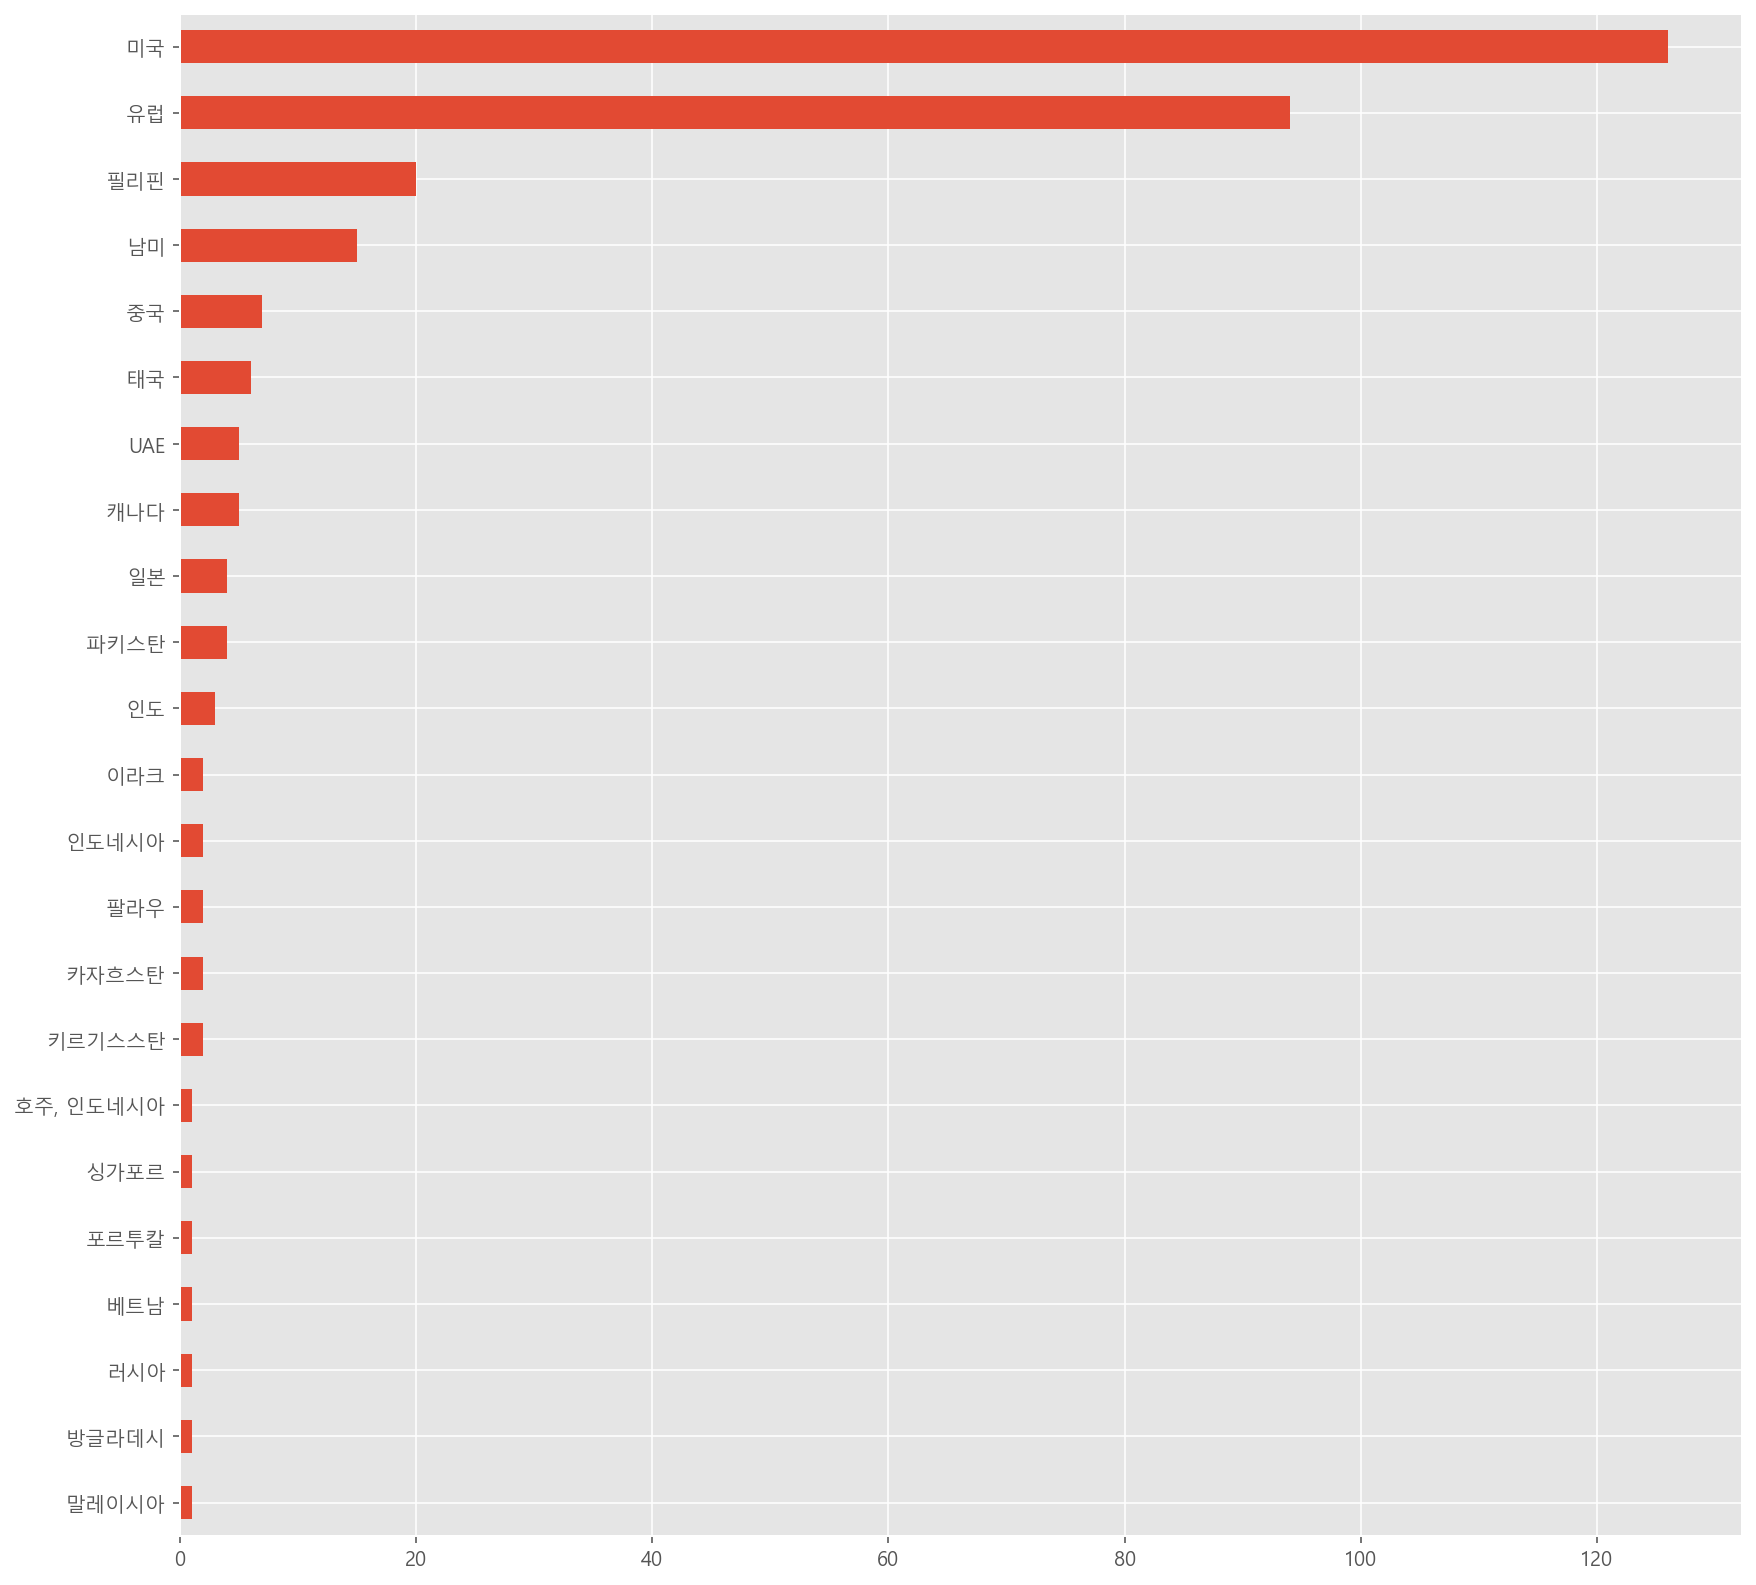

In [131]:
oversea_count.sort_values().plot.barh(figsize=(14,14))

<AxesSubplot:>

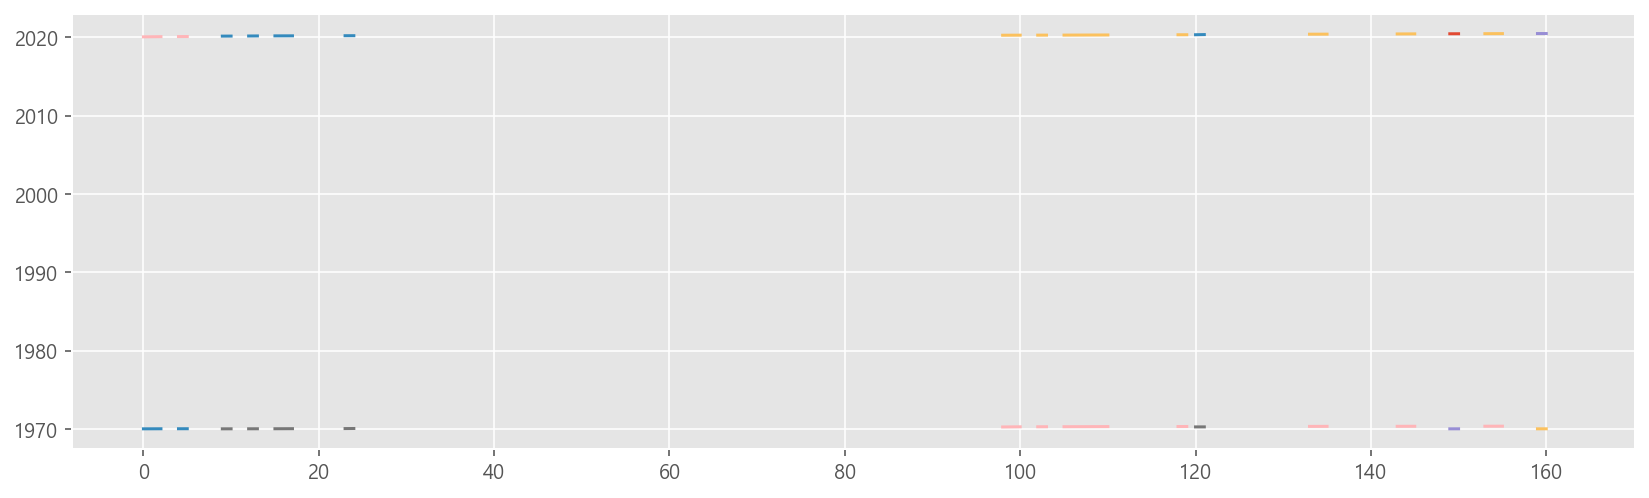

In [132]:
df_day_oversea.pivot(columns="해외").plot(figsize=(14,4), legend = False)

<AxesSubplot:title={'center':'중국'}>

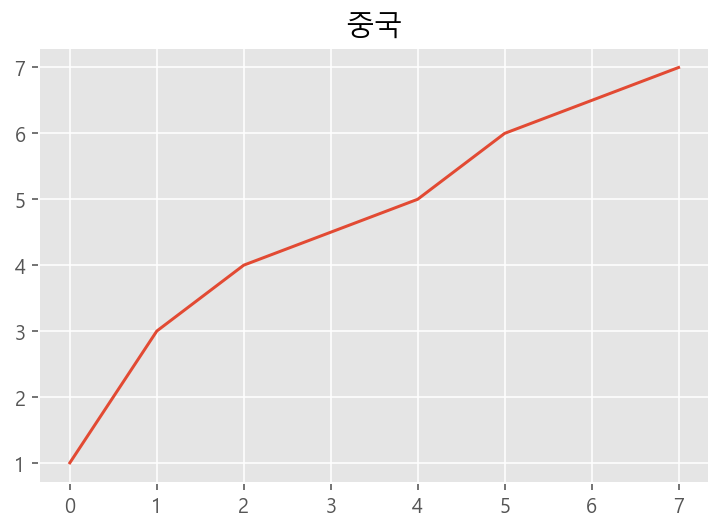

In [133]:
df_day_oversea.loc[df_day_oversea["해외"] == "중국","누적확진수"].plot(title="중국")

<AxesSubplot:>

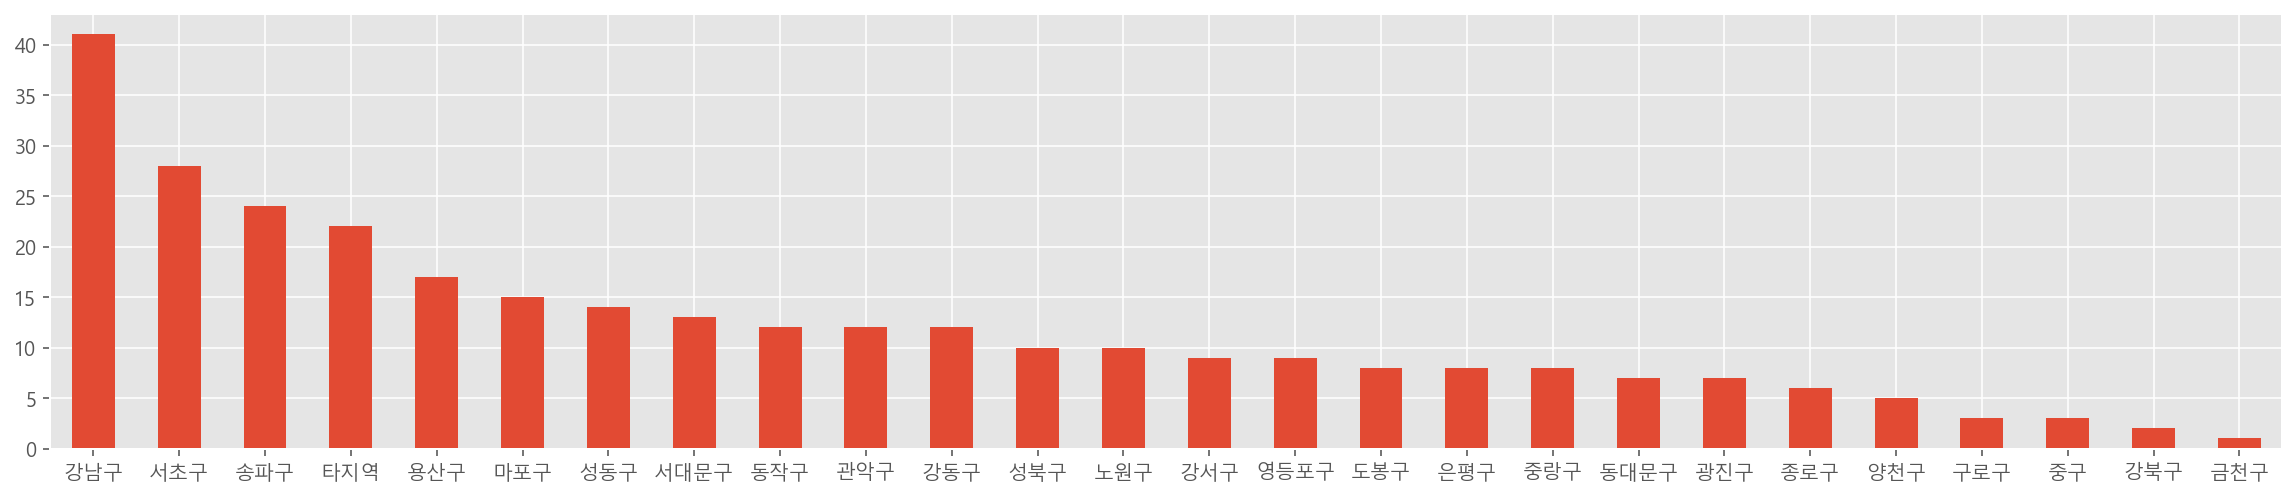

In [134]:
df_oversea["지역"].value_counts().plot.bar(figsize=(20,4),rot=0)

In [135]:
oversea_count_gu = df_oversea["지역"].value_counts()
oversea_count_gu.head()

강남구    41
서초구    28
송파구    24
타지역    22
용산구    17
Name: 지역, dtype: int64

<AxesSubplot:>

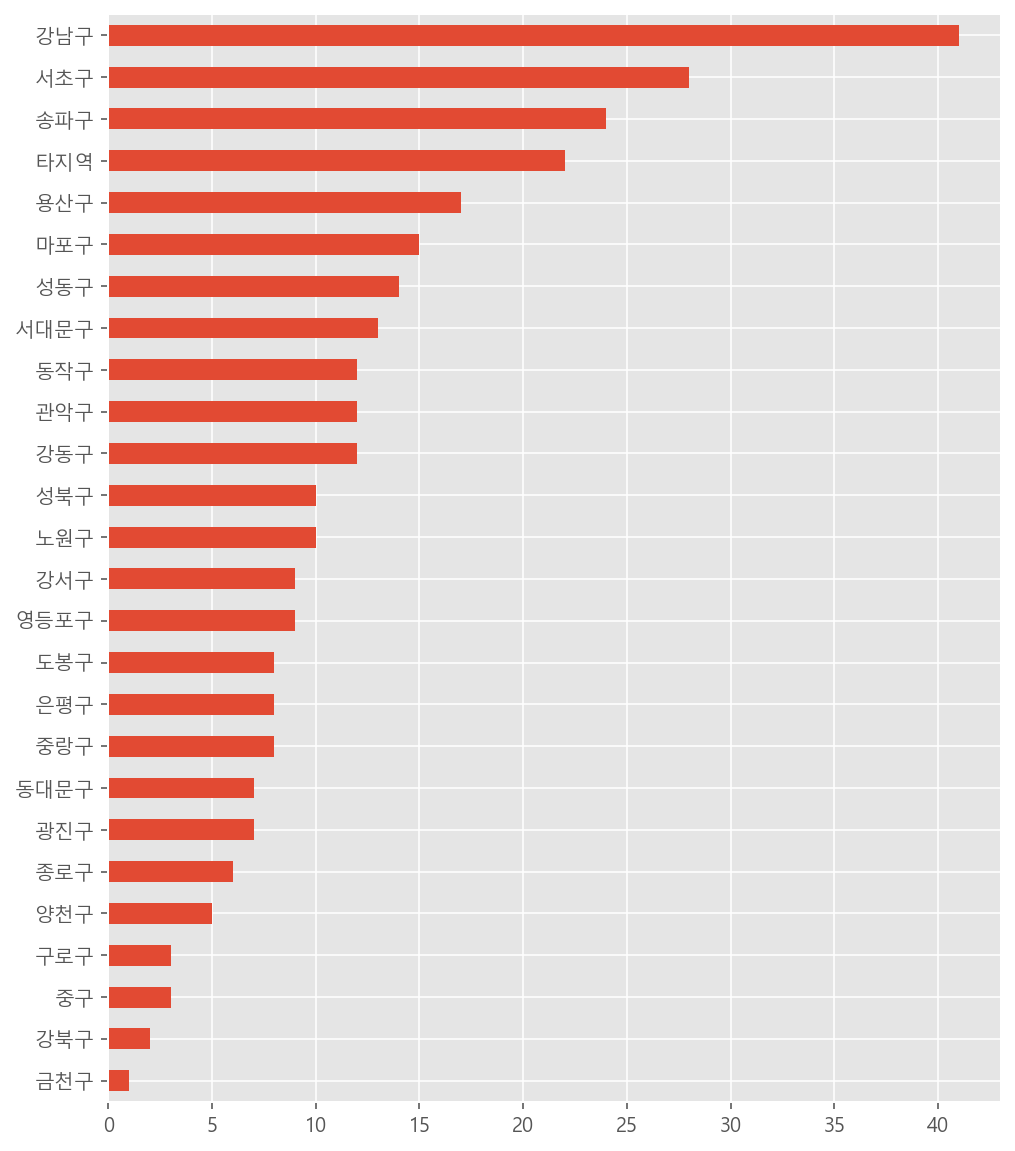

In [136]:
#해외 유입 구별 확진자 시각화 하기 ., #디센딩:값이 큰것부터 나오는거
oversea_count_gu.sort_values().plot.barh(figsize=(8,10)) #어센딩이 기본이다

In [137]:
#전체 확진수와 해외유입 확진수 비교
# all_count_gu 변수에 전체 지역의 확진자수 구하기
all_count_gu = df["지역"].value_counts()
all_count_gu.head()

관악구    117
구로구     86
강남구     83
타지역     81
강서구     78
Name: 지역, dtype: int64

In [138]:
#그래프를 비교해서 그리기 #시리즈 데이터 형식은 merge로 묶어줄수 없다.
#데이터프레임으로 변환하고 컬럼명 변경하기
pd.DataFrame({"해외확진수":oversea_count_gu,"전체확진수":all_count_gu})
#merge로 합쳐주기

,해외확진수,전체확진수
강남구,41,83
강동구,12,35
강북구,2,24
강서구,9,78
관악구,12,117
광진구,7,17
구로구,3,86
금천구,1,32
노원구,10,43
도봉구,8,62


In [139]:
df_all_gu = all_count_gu.to_frame() #to.frame() 사용
df_all_gu.columns = ["전체확진수"]
df_all_gu.head()

,전체확진수
관악구,117
구로구,86
강남구,83
타지역,81
강서구,78


In [140]:
#해외유입확진수 구하기
df_oversea_gu = pd.DataFrame({"해외유입확진수":oversea_count_gu})
df_oversea_gu.head()

,해외유입확진수
강남구,41
서초구,28
송파구,24
타지역,22
용산구,17


In [141]:
#merge로 합쳐서 전체확진수와 해외유입확진수 비교해 보기
df_all_oversea_case = df_all_gu.merge(df_oversea_gu,left_index=True,right_index=True)
df_all_oversea_case.head()

,전체확진수,해외유입확진수
관악구,117,12
구로구,86,3
강남구,83,41
타지역,81,22
강서구,78,9


<AxesSubplot:>

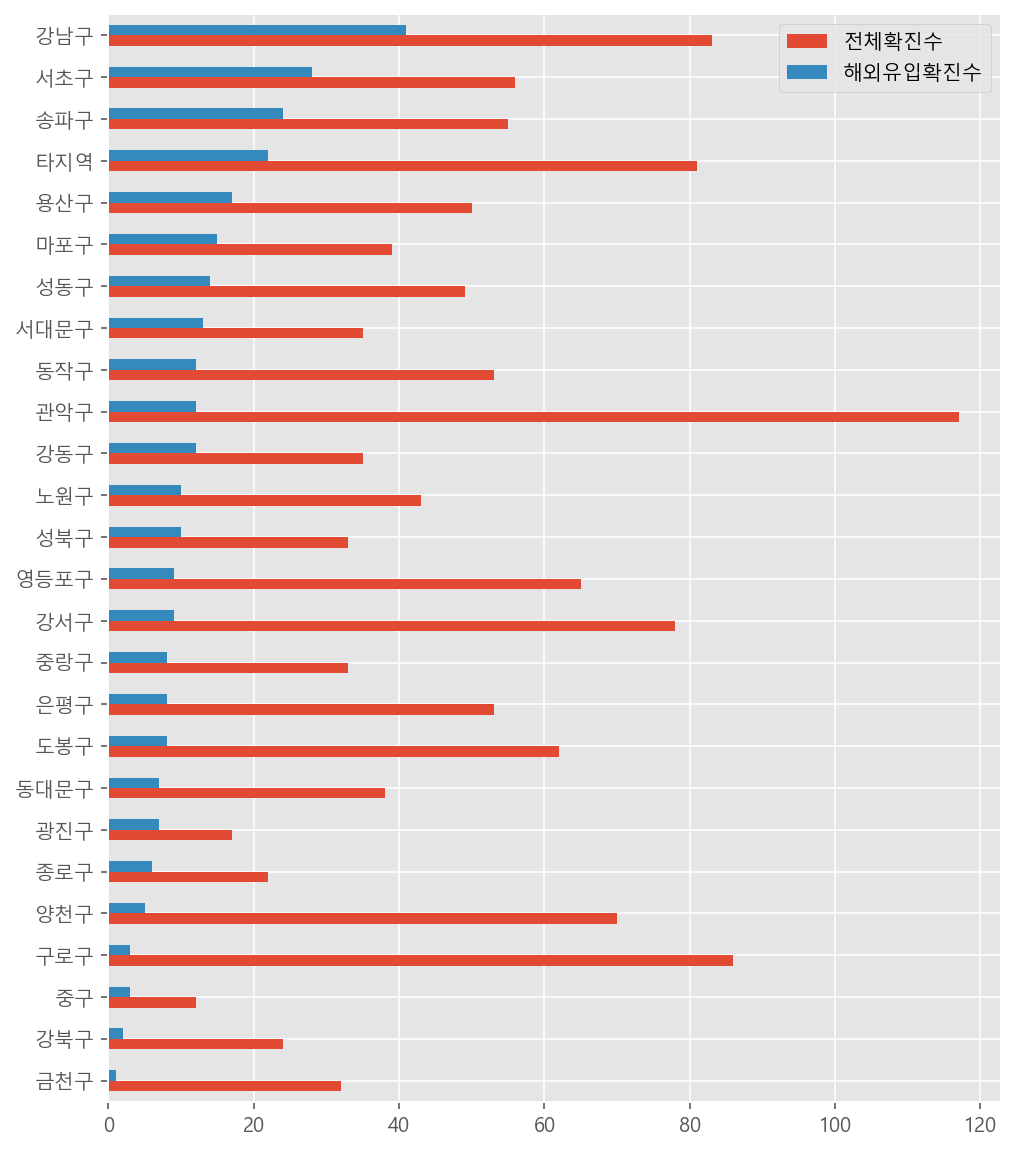

In [142]:
df_all_oversea_case.sort_values(by="해외유입확진수").plot.barh(figsize=(8,10))

In [143]:
#df_all_oversea_case["해외유입비율"] 구하기
df_all_oversea_case["해외유입비율"] = (df_all_oversea_case["해외유입확진수"]/df_all_oversea_case["전체확진수"])*100
df_all_oversea_case

,전체확진수,해외유입확진수,해외유입비율
관악구,117,12,10.256410
구로구,86,3,3.488372
강남구,83,41,49.397590
타지역,81,22,27.160494
강서구,78,9,11.538462
양천구,70,5,7.142857
영등포구,65,9,13.846154
도봉구,62,8,12.903226
서초구,56,28,50.000000
송파구,55,24,43.636364


In [ ]:
#结果
#서울시의 코로나 확진자 분석 - 首尔市 病毒 确诊数 分析的
#날짜 별로, 요일 별로, 각 지역별로 - 按日期、星期、各地区进行了分析。
#어떠한 결론이 나온것이 아니라, 그떄의 코로나 상황을 분석한것이다. - 分析新冠病毒的情况